## Regression Analysis_State-wise_CA

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Feature Engineering

In [3]:
data= pd.read_csv('Regression_new.csv')
corr= data.corr()

In [4]:
data.columns

Index(['Year', 'Month', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY', 'Residential_Retail Price',
       'Industrial_Retail Price', 'Commercial_Retail Price', 'CLDD', 'TAVG',
       'AWND', 'HTDD', 'area', 'population', 'solar-generation', 'Spring',
       'Summer', 'Fall', 'Winter', 'Residential_Usage', 'Industrial_Usage',
       'Commercial_Usage'],
      dtype='object')

In [5]:
features=['Residential_Retail Price', 'Industrial_Retail Price', 'Commercial_Retail Price','CLDD', 'TAVG', 'AWND', 'HTDD', 'area', 'population', 'solar-generation','Summer', 'Fall', 'Winter', 'Residential_Usage', \
          'Industrial_Usage', 'Commercial_Usage']
#Spring is the seasonal feature baseline
data_CA=data[data.CA==1]
data_CA=data_CA[features]
data_CA

,Residential_Retail Price,Industrial_Retail Price,Commercial_Retail Price,CLDD,TAVG,AWND,HTDD,area,population,solar-generation,Summer,Fall,Winter,Residential_Usage,Industrial_Usage,Commercial_Usage
4,16.57,10.35,13.07,5.453177,51.164214,4.103704,431.618729,163694,38596972,75,0,0,1,7773.0,3764,9426
54,16.11,10.56,13.24,4.722039,49.822989,5.756790,427.883224,163694,38623728,77,0,0,1,6260.0,3705,8701
104,15.86,10.62,13.30,9.909091,53.295710,6.533750,370.069421,163694,38650484,111,0,0,0,6152.0,3686,9092
154,10.12,10.51,13.37,35.576412,56.844020,6.920988,279.071429,163694,38677240,121,0,0,0,6146.0,4196,9436
204,16.46,11.35,14.65,103.909402,63.118120,7.831646,162.741880,163694,38703996,133,0,0,0,6399.0,4512,9731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,19.86,15.27,19.01,295.693405,73.966667,6.280519,19.834225,163694,39541760,370,1,0,0,10054.0,4741,10883
3404,20.72,15.26,19.32,173.529946,67.296915,6.409333,104.963702,163694,39545980,331,0,1,0,8450.0,4469,9728
3454,14.97,15.13,17.95,53.797422,58.879190,5.787838,241.716390,163694,39550199,305,0,1,0,7204.0,4290,10324
3504,20.14,14.28,17.06,16.246801,53.386106,4.672000,359.775137,163694,39554419,240,0,1,0,5667.0,3537,7616


In [6]:
def cal_vif(df, feature_columns):
    features= df[feature_columns]
    X = add_constant(features)
    vif=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    
    return vif

In [7]:
commercial_numeric_columns=['Commercial_Retail Price', 'CLDD', 'TAVG', 'AWND', 'HTDD', 'area', 'population', 'solar-generation']
residential_numeric_columns=['Residential_Retail Price', 'CLDD', 'TAVG', 'AWND', 'HTDD', 'area', 'population', 'solar-generation']
industrial_numeric_columns=['Industrial_Retail Price', 'CLDD', 'TAVG', 'AWND', 'HTDD', 'area', 'population', 'solar-generation']

In [8]:
cal_vif(data_CA, commercial_numeric_columns)

Commercial_Retail Price        5.981140
CLDD                          89.067753
TAVG                         606.242420
AWND                           1.775001
HTDD                         277.715541
area                       92447.756911
population                     3.314668
solar-generation               4.409602
dtype: float64

In [9]:
cal_vif(data_CA, residential_numeric_columns)

Residential_Retail Price        1.938744
CLDD                           88.582742
TAVG                          607.227841
AWND                            1.380519
HTDD                          272.559490
area                        93165.697311
population                      3.430611
solar-generation                4.029965
dtype: float64

In [10]:
cal_vif(data_CA, industrial_numeric_columns)

Industrial_Retail Price        5.364034
CLDD                          86.656522
TAVG                         602.299125
AWND                           1.915826
HTDD                         275.202040
area                       92388.505006
population                     3.333238
solar-generation               4.475700
dtype: float64

Since `TAVG` and `area` goe large VIF, we decided to delete these two columns.

In [11]:
commercial_numeric_columns_adj=['Commercial_Retail Price', 'CLDD','AWND', 'HTDD', 'population', 'solar-generation']
cal_vif(data_CA, commercial_numeric_columns_adj)

const                      60382.632268
Commercial_Retail Price        5.920372
CLDD                           5.698946
AWND                           1.696462
HTDD                           5.374792
population                     3.296876
solar-generation               4.306940
dtype: float64

In [12]:
industrial_numeric_columns_adj=['Industrial_Retail Price', 'CLDD','AWND', 'HTDD', 'population', 'solar-generation']
cal_vif(data_CA, industrial_numeric_columns_adj)

const                      60583.192682
Industrial_Retail Price        5.344297
CLDD                           5.083920
AWND                           1.848062
HTDD                           5.487456
population                     3.313536
solar-generation               4.388743
dtype: float64

In [13]:
residential_numeric_columns_adj=['Residential_Retail Price', 'CLDD','AWND', 'HTDD', 'population', 'solar-generation']
cal_vif(data_CA, residential_numeric_columns_adj)

const                       62585.391426
Residential_Retail Price        1.915932
CLDD                            5.249797
AWND                            1.324660
HTDD                            5.724195
population                      3.418188
solar-generation                3.946806
dtype: float64

In [14]:
data_CA= data_CA.drop(['TAVG', 'area'],axis = 1)

## Train Test Split and Data Scaling

In [15]:
#Train-Test Split
train, test = train_test_split(data_CA, test_size=0.2)

#splitX,y
def x_y_split(data, y_name, drop_features):
    X = data.drop(drop_features, axis = 1)
    y = data[y_name]
    return X,y

X_train_c, y_train_c = x_y_split(train, 'Commercial_Usage', ['Industrial_Retail Price', 'Residential_Retail Price',\
                                                             'Residential_Usage', 'Industrial_Usage', 'Commercial_Usage'])
X_test_c,y_test_c = x_y_split(test, 'Commercial_Usage', ['Industrial_Retail Price', 'Residential_Retail Price',\
                                                         'Residential_Usage', 'Industrial_Usage', 'Commercial_Usage'])

X_train_r, y_train_r = x_y_split(train, 'Residential_Usage', ['Industrial_Retail Price', 'Commercial_Retail Price',\
                                                             'Residential_Usage', 'Industrial_Usage', 'Commercial_Usage'])
X_test_r,y_test_r = x_y_split(test, 'Residential_Usage', ['Industrial_Retail Price', 'Commercial_Retail Price',\
                                                         'Residential_Usage', 'Industrial_Usage', 'Commercial_Usage'])

X_train_i, y_train_i = x_y_split(train, 'Industrial_Usage', ['Commercial_Retail Price', 'Residential_Retail Price',\
                                                             'Residential_Usage', 'Industrial_Usage', 'Commercial_Usage'])
X_test_i,y_test_i = x_y_split(test, 'Industrial_Usage', ['Commercial_Retail Price', 'Residential_Retail Price',\
                                                         'Residential_Usage', 'Industrial_Usage', 'Commercial_Usage'])

In [16]:
train.columns

Index(['Residential_Retail Price', 'Industrial_Retail Price',
       'Commercial_Retail Price', 'CLDD', 'AWND', 'HTDD', 'population',
       'solar-generation', 'Summer', 'Fall', 'Winter', 'Residential_Usage',
       'Industrial_Usage', 'Commercial_Usage'],
      dtype='object')

In [17]:
#categorize X features
categorical_feature_name = ['Summer', 'Fall', 'Winter']

In [18]:
#Scale the data through Robust Scaler

def minmax_scaler(X_train, X_test, numeric_feature_name):
    minMax_Scaler = MinMaxScaler()
    # fit and tranform the training data
    X_train[numeric_feature_name] = minMax_Scaler.fit_transform(X_train[numeric_feature_name]) 
    # tranform test data
    X_test[numeric_feature_name] = minMax_Scaler.transform(X_test[numeric_feature_name]) 
    return (X_train,X_test)

X_train_c, X_test_c = minmax_scaler(X_train_c, X_test_c, commercial_numeric_columns_adj)
X_train_r, X_test_r = minmax_scaler(X_train_r, X_test_r, residential_numeric_columns_adj)
X_train_i, X_test_i = minmax_scaler(X_train_i, X_test_i, industrial_numeric_columns_adj)

### Commercial Consumption Forecast

### Commercial_Linear Regression

In [19]:
def sm_regression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.params
    print(results.summary())
    predictions = results.predict(X_test)
    df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': predictions})
    
    return df_pred

In [20]:
df_pred_c=sm_regression(X_train_c, y_train_c, X_test_c, y_test_c)

                            OLS Regression Results                            
Dep. Variable:       Commercial_Usage   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     12.06
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           1.37e-09
Time:                        10:13:05   Log-Likelihood:                -435.37
No. Observations:                  57   AIC:                             890.7
Df Residuals:                      47   BIC:                             911.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9

In [21]:
df_pred_c

,Actual,Predicted
1904,9393,9386.535957
604,9125,9399.693074
1054,11049,10301.740960
3454,10324,9548.971312
3354,10883,10819.350297
1454,10124,10108.877695
3104,9133,9165.292537
3404,9728,10420.294814
2754,12393,10733.476272
2804,8904,10423.498607


In [22]:
#Evaluate Performance: MAE, MSE, RMSE
def evaluate_performances(y_test, y_pred):
    print('Performance Evaluation')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

In [23]:
# Evaluate Performance
evaluate_performances(df_pred_c['Actual'], df_pred_c['Predicted'])

Performance Evaluation
Mean Absolute Error: 544.4385373674497
Mean Squared Error: 559508.675407945
Root Mean Squared Error: 748.0031252661615


### Commercial_Feature Importance

xgbRegressor = XGBRegressor(objective ='reg:squarederror')
xgbRegressor.fit(X_train_c, y_train_c)

fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(xgbRegressor, height=0.8, ax=ax)

### Commercial_Regression_Visualizations

In [24]:
# Correlation Analysis between Y and X's
def correlation_analysis(data, x_vars_list, y_vars_list):
    sns.pairplot(data, x_vars = x_vars_list, y_vars = y_vars_list, size=7, aspect=0.8,kind = 'reg')
#     plt.savefig("pairplot.jpg")
    plt.show()

In [25]:
#Visualize the output
def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in line plot
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",x='Actual', y='Predicted',ax=axes[0])
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2]) 

In [26]:
# Visualization
def visualization(y_test, y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_test)),y_test,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_test)),y_test,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

C:\Users\Maggie\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


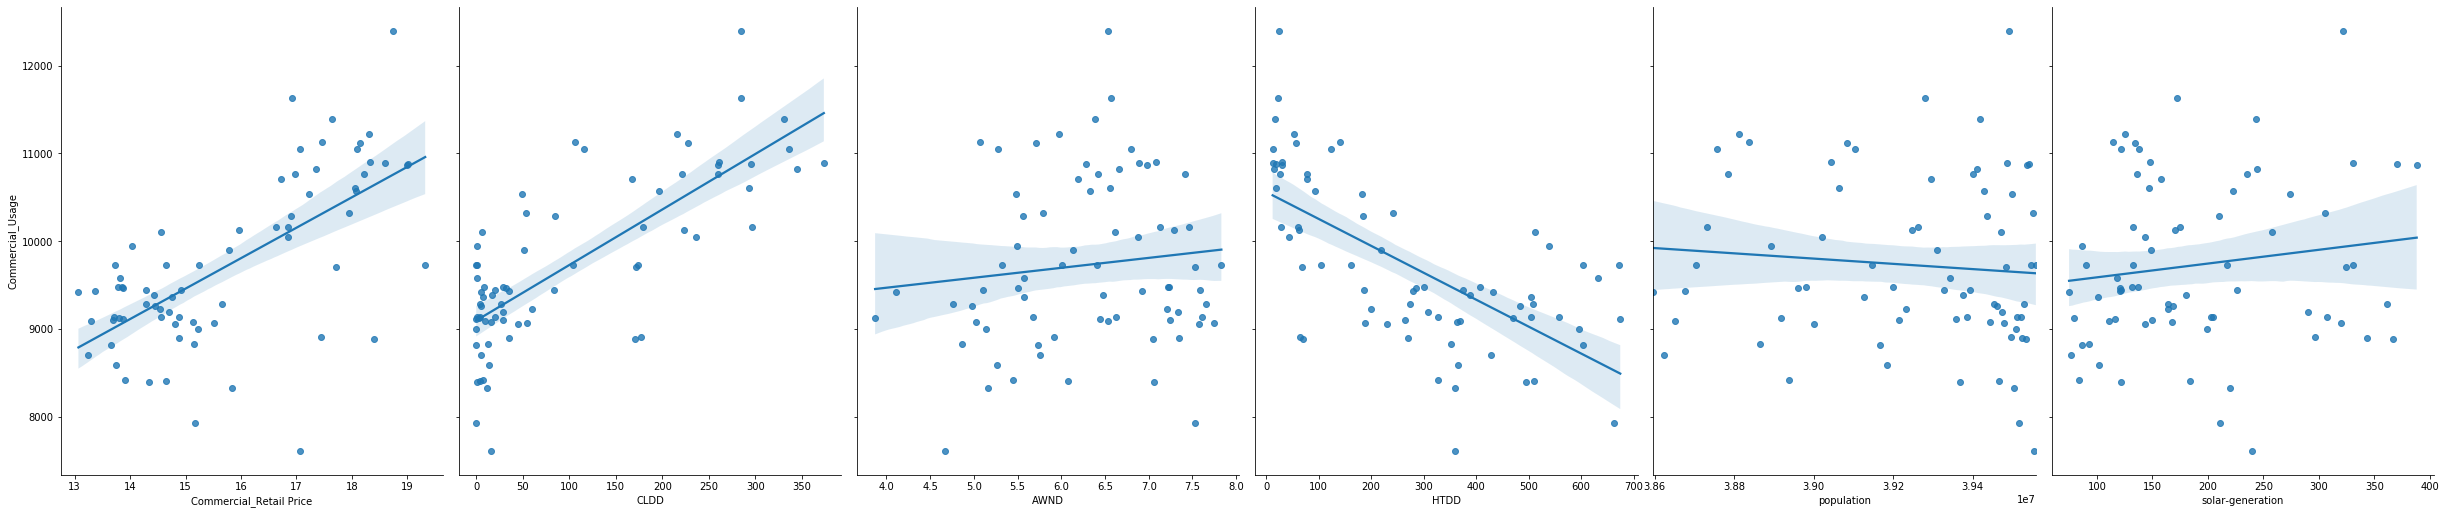

In [27]:
# Correlation Analysis
correlation_analysis(data_CA, commercial_numeric_columns_adj, ['Commercial_Usage'])

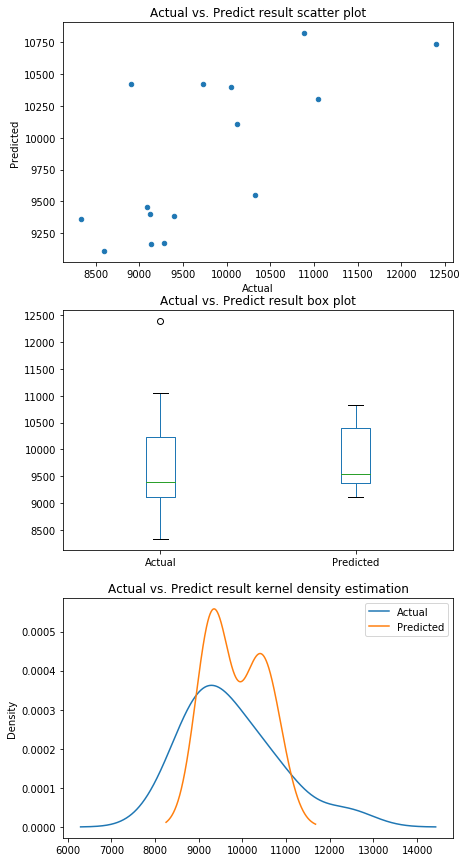

In [28]:
# Visualize Output
visualize_graph(df_pred_c)

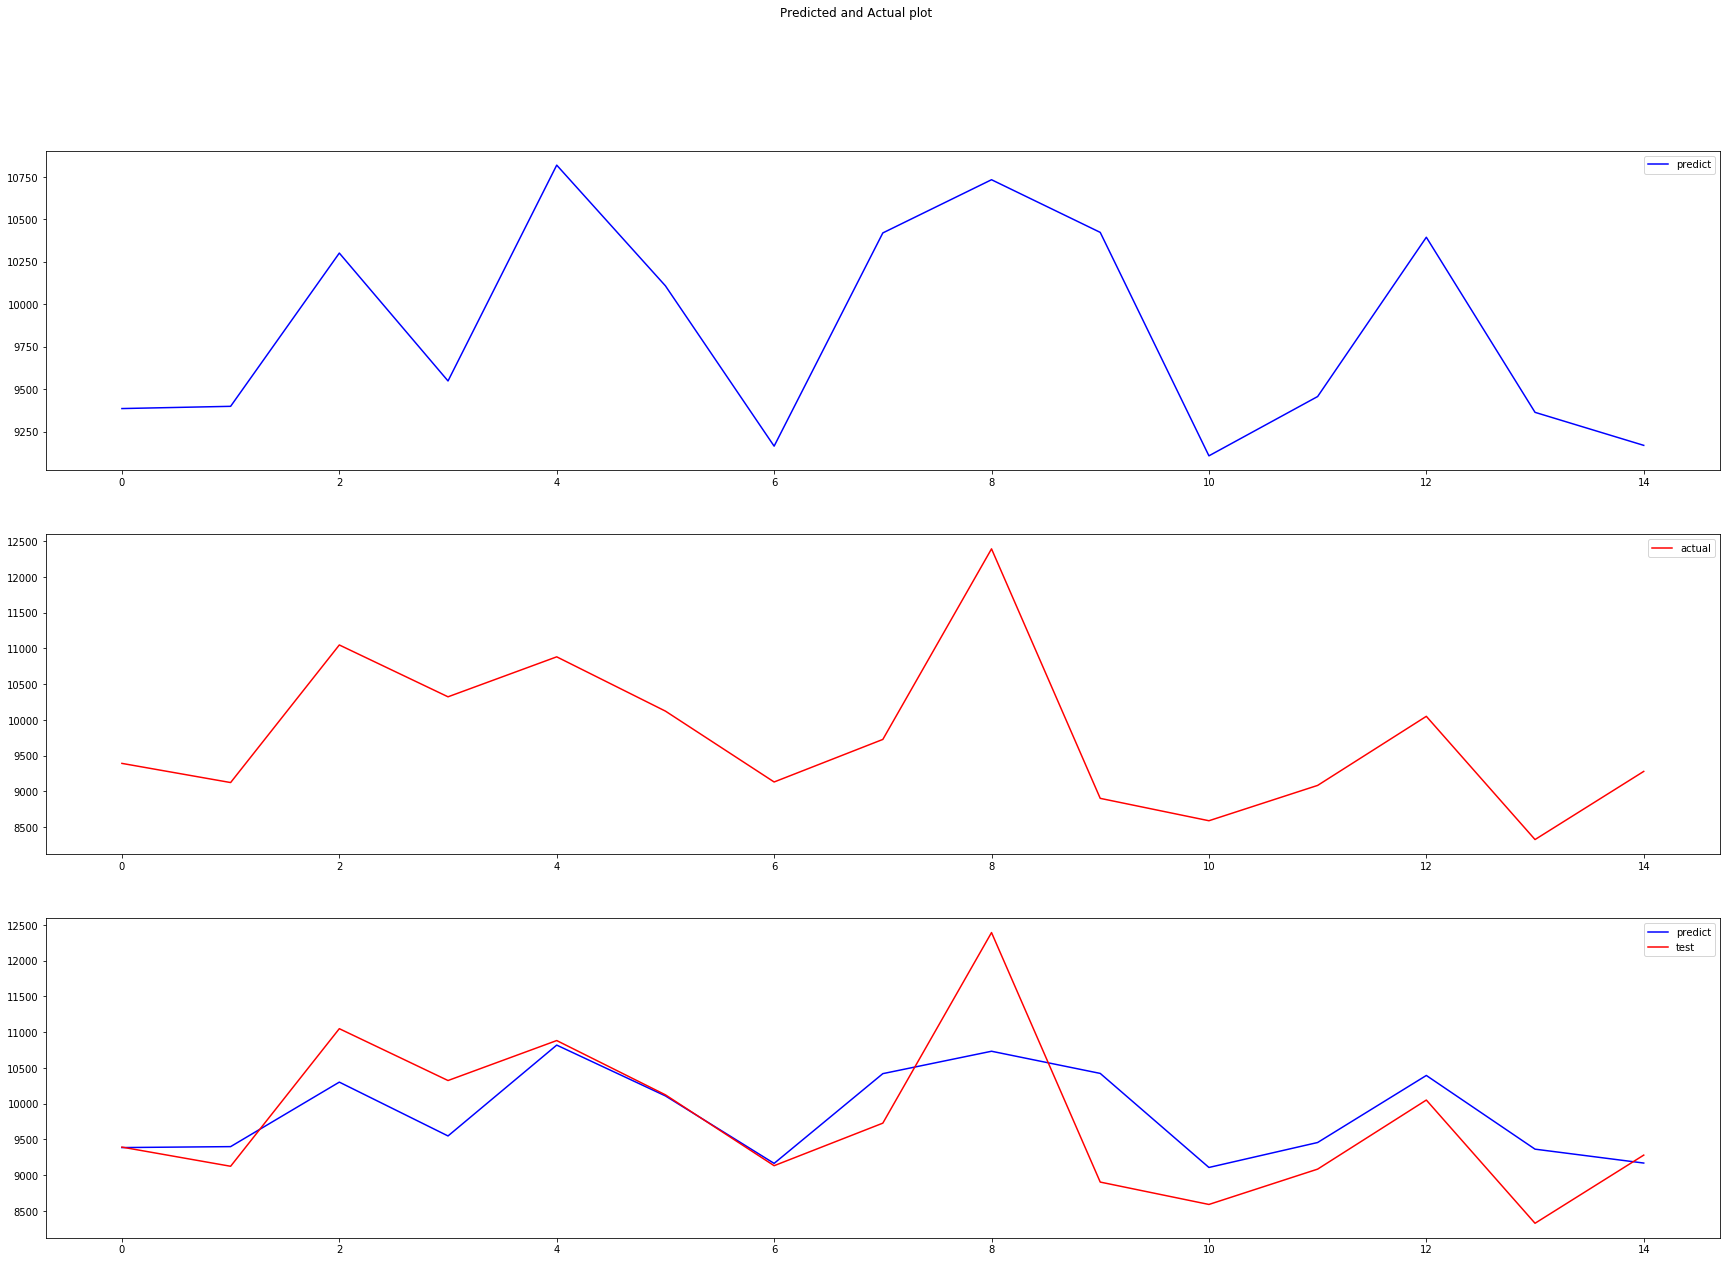

In [29]:
visualization(df_pred_c.Actual, df_pred_c.Predicted)

### Commercial_ANN

In [96]:
features_ANN_c=['Month','Commercial_Usage', 'CLDD', 'AWND', 'HTDD', 'population','solar-generation','Summer', 'Fall', 'Winter', 'Commercial_Retail Price']
#Spring is the seasonal feature baseline
data_CA_ANN=data[data.CA==1]
data_CA_ANN=data_CA_ANN[features_ANN_c]
data_CA_ANN

,Month,Commercial_Usage,CLDD,AWND,HTDD,population,solar-generation,Summer,Fall,Winter,Commercial_Retail Price
4,1,9426,5.453177,4.103704,431.618729,38596972,75,0,0,1,13.07
54,2,8701,4.722039,5.756790,427.883224,38623728,77,0,0,1,13.24
104,3,9092,9.909091,6.533750,370.069421,38650484,111,0,0,0,13.30
154,4,9436,35.576412,6.920988,279.071429,38677240,121,0,0,0,13.37
204,5,9731,103.909402,7.831646,162.741880,38703996,133,0,0,0,14.65
...,...,...,...,...,...,...,...,...,...,...,...
3354,8,10883,295.693405,6.280519,19.834225,39541760,370,1,0,0,19.01
3404,9,9728,173.529946,6.409333,104.963702,39545980,331,0,1,0,19.32
3454,10,10324,53.797422,5.787838,241.716390,39550199,305,0,1,0,17.95
3504,11,7616,16.246801,4.672000,359.775137,39554419,240,0,1,0,17.06


In [97]:
train_ANN, test_ANN = train_test_split(data_CA_ANN, test_size=0.2)
X_train_ANN_c, y_train_ANN_c = x_y_split(train_ANN, 'Commercial_Usage', ['Commercial_Usage'])
X_test_ANN_c,y_test_ANN_c = x_y_split(test_ANN, 'Commercial_Usage', ['Commercial_Usage'])

In [98]:
X_train_ANN_c, X_test_ANN_c = minmax_scaler(X_train_ANN_c, X_test_ANN_c, commercial_numeric_columns_adj)
y_train_ANN_c = (y_train_ANN_c - min(y_train_ANN_c))/(max(y_train_ANN_c) - min(y_train_ANN_c))
X_train_ANN_c

,Month,CLDD,AWND,HTDD,population,solar-generation,Summer,Fall,Winter,Commercial_Retail Price
4,1,0.014502,0.058992,0.633055,0.000000,0.000000,0,0,1,0.0000
2704,7,1.000000,0.760900,0.000000,0.925409,0.817891,1,0,0,0.8832
2104,7,0.921628,0.704965,0.003467,0.845482,0.539936,1,0,0,0.6864
3254,6,0.457843,0.802050,0.088623,0.973674,0.932907,1,0,0,0.8512
2904,11,0.031283,0.325814,0.525375,0.942959,0.463259,0,1,0,0.4416
3004,1,0.001067,0.457340,0.825113,0.951735,0.415335,0,0,1,0.2912
2304,11,0.043723,0.291945,0.529903,0.881214,0.297125,0,1,0,0.3312
1754,12,0.001172,0.430786,0.936716,0.775297,0.137380,0,0,1,0.1200
2204,9,0.526742,0.620501,0.122650,0.863348,0.472843,0,1,0,0.8016
3104,3,0.011402,0.696227,0.743679,0.960510,0.741214,0,0,0,0.2368


In [99]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X_train_ANN_c, y_train_ANN_c, validation_split = 0.2, batch_size = 10, epochs = 1800)

Train on 45 samples, validate on 12 samples
Epoch 1/1800
45/45 [==============================] - 1s 17ms/sample - loss: 0.0479 - mae: 0.1931 - val_loss: 0.0717 - val_mae: 0.2285
Epoch 2/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0476 - mae: 0.1924 - val_loss: 0.0716 - val_mae: 0.2285
Epoch 3/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0473 - mae: 0.1918 - val_loss: 0.0714 - val_mae: 0.2285
Epoch 4/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0470 - mae: 0.1912 - val_loss: 0.0713 - val_mae: 0.2285
Epoch 5/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0467 - mae: 0.1905 - val_loss: 0.0712 - val_mae: 0.2285
Epoch 6/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0463 - mae: 0.1897 - val_loss: 0.0711 - val_mae: 0.2286
Epoch 7/1800
45/45 [==============================] - 0s 598us/sample - loss: 0.0460 - mae: 0.1890 - val_loss: 0.0709 - val_mae: 0.2287
Epoch

45/45 [==============================] - 0s 510us/sample - loss: 0.0207 - mae: 0.1185 - val_loss: 0.0357 - val_mae: 0.1492
Epoch 60/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0204 - mae: 0.1167 - val_loss: 0.0347 - val_mae: 0.1466
Epoch 61/1800
45/45 [==============================] - 0s 533us/sample - loss: 0.0200 - mae: 0.1156 - val_loss: 0.0338 - val_mae: 0.1436
Epoch 62/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0198 - mae: 0.1147 - val_loss: 0.0330 - val_mae: 0.1409
Epoch 63/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0194 - mae: 0.1139 - val_loss: 0.0320 - val_mae: 0.1388
Epoch 64/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0195 - mae: 0.1138 - val_loss: 0.0312 - val_mae: 0.1373
Epoch 65/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0190 - mae: 0.1125 - val_loss: 0.0306 - val_mae: 0.1345
Epoch 66/1800
45/45 [==============================] - 

45/45 [==============================] - 0s 510us/sample - loss: 0.0154 - mae: 0.1009 - val_loss: 0.0198 - val_mae: 0.1001
Epoch 119/1800
45/45 [==============================] - 0s 511us/sample - loss: 0.0155 - mae: 0.1012 - val_loss: 0.0199 - val_mae: 0.0999
Epoch 120/1800
45/45 [==============================] - 0s 511us/sample - loss: 0.0154 - mae: 0.1006 - val_loss: 0.0196 - val_mae: 0.1000
Epoch 121/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0154 - mae: 0.1000 - val_loss: 0.0195 - val_mae: 0.1002
Epoch 122/1800
45/45 [==============================] - 0s 511us/sample - loss: 0.0153 - mae: 0.0998 - val_loss: 0.0196 - val_mae: 0.1004
Epoch 123/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0153 - mae: 0.0997 - val_loss: 0.0196 - val_mae: 0.1004
Epoch 124/1800
45/45 [==============================] - 0s 487us/sample - loss: 0.0153 - mae: 0.1002 - val_loss: 0.0200 - val_mae: 0.1003
Epoch 125/1800
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0141 - mae: 0.0951 - val_loss: 0.0190 - val_mae: 0.1037
Epoch 178/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0140 - mae: 0.0945 - val_loss: 0.0190 - val_mae: 0.1037
Epoch 179/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0140 - mae: 0.0948 - val_loss: 0.0192 - val_mae: 0.1034
Epoch 180/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0140 - mae: 0.0948 - val_loss: 0.0192 - val_mae: 0.1035
Epoch 181/1800
45/45 [==============================] - 0s 533us/sample - loss: 0.0140 - mae: 0.0947 - val_loss: 0.0190 - val_mae: 0.1037
Epoch 182/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0140 - mae: 0.0944 - val_loss: 0.0190 - val_mae: 0.1039
Epoch 183/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0142 - mae: 0.0958 - val_loss: 0.0193 - val_mae: 0.1037
Epoch 184/1800
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0135 - mae: 0.0933 - val_loss: 0.0197 - val_mae: 0.1077
Epoch 237/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0135 - mae: 0.0933 - val_loss: 0.0193 - val_mae: 0.1076
Epoch 238/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0134 - mae: 0.0930 - val_loss: 0.0192 - val_mae: 0.1074
Epoch 239/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0134 - mae: 0.0930 - val_loss: 0.0191 - val_mae: 0.1074
Epoch 240/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0136 - mae: 0.0934 - val_loss: 0.0190 - val_mae: 0.1077
Epoch 241/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0134 - mae: 0.0929 - val_loss: 0.0192 - val_mae: 0.1076
Epoch 242/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0135 - mae: 0.0936 - val_loss: 0.0194 - val_mae: 0.1072
Epoch 243/1800
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0129 - mae: 0.0907 - val_loss: 0.0198 - val_mae: 0.1100
Epoch 296/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0129 - mae: 0.0907 - val_loss: 0.0197 - val_mae: 0.1104
Epoch 297/1800
45/45 [==============================] - 0s 511us/sample - loss: 0.0130 - mae: 0.0911 - val_loss: 0.0195 - val_mae: 0.1102
Epoch 298/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0130 - mae: 0.0907 - val_loss: 0.0198 - val_mae: 0.1100
Epoch 299/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0129 - mae: 0.0906 - val_loss: 0.0198 - val_mae: 0.1101
Epoch 300/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0128 - mae: 0.0907 - val_loss: 0.0201 - val_mae: 0.1099
Epoch 301/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0128 - mae: 0.0906 - val_loss: 0.0202 - val_mae: 0.1098
Epoch 302/1800
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0124 - mae: 0.0884 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 355/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0124 - mae: 0.0884 - val_loss: 0.0194 - val_mae: 0.1101
Epoch 356/1800
45/45 [==============================] - 0s 511us/sample - loss: 0.0124 - mae: 0.0884 - val_loss: 0.0197 - val_mae: 0.1101
Epoch 357/1800
45/45 [==============================] - 0s 489us/sample - loss: 0.0125 - mae: 0.0890 - val_loss: 0.0200 - val_mae: 0.1102
Epoch 358/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0124 - mae: 0.0888 - val_loss: 0.0199 - val_mae: 0.1102
Epoch 359/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0124 - mae: 0.0885 - val_loss: 0.0196 - val_mae: 0.1100
Epoch 360/1800
45/45 [==============================] - 0s 489us/sample - loss: 0.0123 - mae: 0.0881 - val_loss: 0.0195 - val_mae: 0.1103
Epoch 361/1800
45/45 [===========================

45/45 [==============================] - 0s 465us/sample - loss: 0.0120 - mae: 0.0864 - val_loss: 0.0199 - val_mae: 0.1102
Epoch 414/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0119 - mae: 0.0862 - val_loss: 0.0197 - val_mae: 0.1102
Epoch 415/1800
45/45 [==============================] - 0s 533us/sample - loss: 0.0119 - mae: 0.0858 - val_loss: 0.0196 - val_mae: 0.1103
Epoch 416/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0119 - mae: 0.0857 - val_loss: 0.0197 - val_mae: 0.1103
Epoch 417/1800
45/45 [==============================] - 0s 621us/sample - loss: 0.0120 - mae: 0.0867 - val_loss: 0.0199 - val_mae: 0.1103
Epoch 418/1800
45/45 [==============================] - 0s 665us/sample - loss: 0.0119 - mae: 0.0863 - val_loss: 0.0195 - val_mae: 0.1103
Epoch 419/1800
45/45 [==============================] - 0s 621us/sample - loss: 0.0119 - mae: 0.0856 - val_loss: 0.0195 - val_mae: 0.1105
Epoch 420/1800
45/45 [===========================

45/45 [==============================] - 0s 598us/sample - loss: 0.0116 - mae: 0.0843 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 473/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0115 - mae: 0.0842 - val_loss: 0.0194 - val_mae: 0.1101
Epoch 474/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0115 - mae: 0.0838 - val_loss: 0.0193 - val_mae: 0.1104
Epoch 475/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0115 - mae: 0.0836 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 476/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0116 - mae: 0.0836 - val_loss: 0.0192 - val_mae: 0.1106
Epoch 477/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0115 - mae: 0.0832 - val_loss: 0.0192 - val_mae: 0.1104
Epoch 478/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0115 - mae: 0.0834 - val_loss: 0.0192 - val_mae: 0.1102
Epoch 479/1800
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0111 - mae: 0.0814 - val_loss: 0.0192 - val_mae: 0.1102
Epoch 532/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0110 - mae: 0.0808 - val_loss: 0.0192 - val_mae: 0.1098
Epoch 533/1800
45/45 [==============================] - 0s 487us/sample - loss: 0.0110 - mae: 0.0806 - val_loss: 0.0191 - val_mae: 0.1099
Epoch 534/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0110 - mae: 0.0804 - val_loss: 0.0192 - val_mae: 0.1096
Epoch 535/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0110 - mae: 0.0813 - val_loss: 0.0193 - val_mae: 0.1090
Epoch 536/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0110 - mae: 0.0816 - val_loss: 0.0193 - val_mae: 0.1089
Epoch 537/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0110 - mae: 0.0810 - val_loss: 0.0191 - val_mae: 0.1092
Epoch 538/1800
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0106 - mae: 0.0788 - val_loss: 0.0190 - val_mae: 0.1087
Epoch 591/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0107 - mae: 0.0796 - val_loss: 0.0190 - val_mae: 0.1086
Epoch 592/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0106 - mae: 0.0792 - val_loss: 0.0190 - val_mae: 0.1087
Epoch 593/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0106 - mae: 0.0787 - val_loss: 0.0188 - val_mae: 0.1091
Epoch 594/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0107 - mae: 0.0790 - val_loss: 0.0188 - val_mae: 0.1088
Epoch 595/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0106 - mae: 0.0788 - val_loss: 0.0188 - val_mae: 0.1090
Epoch 596/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0106 - mae: 0.0790 - val_loss: 0.0188 - val_mae: 0.1090
Epoch 597/1800
45/45 [===========================

45/45 [==============================] - 0s 687us/sample - loss: 0.0103 - mae: 0.0774 - val_loss: 0.0185 - val_mae: 0.1084
Epoch 650/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0103 - mae: 0.0771 - val_loss: 0.0185 - val_mae: 0.1085
Epoch 651/1800
45/45 [==============================] - 0s 621us/sample - loss: 0.0103 - mae: 0.0773 - val_loss: 0.0185 - val_mae: 0.1087
Epoch 652/1800
45/45 [==============================] - 0s 621us/sample - loss: 0.0103 - mae: 0.0772 - val_loss: 0.0185 - val_mae: 0.1085
Epoch 653/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0103 - mae: 0.0771 - val_loss: 0.0185 - val_mae: 0.1083
Epoch 654/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0103 - mae: 0.0771 - val_loss: 0.0184 - val_mae: 0.1082
Epoch 655/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0103 - mae: 0.0772 - val_loss: 0.0184 - val_mae: 0.1080
Epoch 656/1800
45/45 [===========================

45/45 [==============================] - 0s 533us/sample - loss: 0.0100 - mae: 0.0757 - val_loss: 0.0182 - val_mae: 0.1070
Epoch 709/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0101 - mae: 0.0758 - val_loss: 0.0182 - val_mae: 0.1066
Epoch 710/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0100 - mae: 0.0763 - val_loss: 0.0182 - val_mae: 0.1067
Epoch 711/1800
45/45 [==============================] - 0s 487us/sample - loss: 0.0100 - mae: 0.0759 - val_loss: 0.0181 - val_mae: 0.1072
Epoch 712/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0100 - mae: 0.0756 - val_loss: 0.0181 - val_mae: 0.1073
Epoch 713/1800
45/45 [==============================] - 0s 487us/sample - loss: 0.0101 - mae: 0.0762 - val_loss: 0.0181 - val_mae: 0.1073
Epoch 714/1800
45/45 [==============================] - 0s 509us/sample - loss: 0.0100 - mae: 0.0757 - val_loss: 0.0180 - val_mae: 0.1075
Epoch 715/1800
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0098 - mae: 0.0745 - val_loss: 0.0175 - val_mae: 0.1044
Epoch 768/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0098 - mae: 0.0746 - val_loss: 0.0175 - val_mae: 0.1044
Epoch 769/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0098 - mae: 0.0746 - val_loss: 0.0175 - val_mae: 0.1043
Epoch 770/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0098 - mae: 0.0748 - val_loss: 0.0176 - val_mae: 0.1041
Epoch 771/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0097 - mae: 0.0746 - val_loss: 0.0175 - val_mae: 0.1042
Epoch 772/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0098 - mae: 0.0750 - val_loss: 0.0176 - val_mae: 0.1037
Epoch 773/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0098 - mae: 0.0751 - val_loss: 0.0175 - val_mae: 0.1036
Epoch 774/1800
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0097 - mae: 0.0757 - val_loss: 0.0171 - val_mae: 0.1017
Epoch 827/1800
45/45 [==============================] - 0s 531us/sample - loss: 0.0096 - mae: 0.0744 - val_loss: 0.0169 - val_mae: 0.1023
Epoch 828/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0096 - mae: 0.0737 - val_loss: 0.0168 - val_mae: 0.1025
Epoch 829/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0096 - mae: 0.0735 - val_loss: 0.0169 - val_mae: 0.1020
Epoch 830/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0095 - mae: 0.0738 - val_loss: 0.0170 - val_mae: 0.1021
Epoch 831/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0095 - mae: 0.0744 - val_loss: 0.0171 - val_mae: 0.1018
Epoch 832/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0095 - mae: 0.0743 - val_loss: 0.0170 - val_mae: 0.1020
Epoch 833/1800
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0093 - mae: 0.0722 - val_loss: 0.0166 - val_mae: 0.1023
Epoch 886/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0093 - mae: 0.0720 - val_loss: 0.0167 - val_mae: 0.1022
Epoch 887/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0093 - mae: 0.0730 - val_loss: 0.0167 - val_mae: 0.1021
Epoch 888/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0094 - mae: 0.0731 - val_loss: 0.0166 - val_mae: 0.1024
Epoch 889/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0093 - mae: 0.0726 - val_loss: 0.0166 - val_mae: 0.1023
Epoch 890/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0093 - mae: 0.0723 - val_loss: 0.0166 - val_mae: 0.1023
Epoch 891/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0093 - mae: 0.0721 - val_loss: 0.0166 - val_mae: 0.1021
Epoch 892/1800
45/45 [===========================

45/45 [==============================] - 0s 555us/sample - loss: 0.0092 - mae: 0.0725 - val_loss: 0.0163 - val_mae: 0.1016
Epoch 945/1800
45/45 [==============================] - 0s 577us/sample - loss: 0.0091 - mae: 0.0710 - val_loss: 0.0162 - val_mae: 0.1018
Epoch 946/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0091 - mae: 0.0707 - val_loss: 0.0163 - val_mae: 0.1013
Epoch 947/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0091 - mae: 0.0709 - val_loss: 0.0164 - val_mae: 0.1008
Epoch 948/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0091 - mae: 0.0714 - val_loss: 0.0164 - val_mae: 0.1004
Epoch 949/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0091 - mae: 0.0713 - val_loss: 0.0163 - val_mae: 0.1005
Epoch 950/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0091 - mae: 0.0712 - val_loss: 0.0163 - val_mae: 0.1009
Epoch 951/1800
45/45 [===========================

45/45 [==============================] - 0s 554us/sample - loss: 0.0089 - mae: 0.0706 - val_loss: 0.0162 - val_mae: 0.1008
Epoch 1004/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0089 - mae: 0.0705 - val_loss: 0.0162 - val_mae: 0.1012
Epoch 1005/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0089 - mae: 0.0705 - val_loss: 0.0163 - val_mae: 0.1008
Epoch 1006/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0089 - mae: 0.0705 - val_loss: 0.0162 - val_mae: 0.1016
Epoch 1007/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0089 - mae: 0.0703 - val_loss: 0.0162 - val_mae: 0.1022
Epoch 1008/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0089 - mae: 0.0701 - val_loss: 0.0161 - val_mae: 0.1027
Epoch 1009/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0089 - mae: 0.0705 - val_loss: 0.0162 - val_mae: 0.1023
Epoch 1010/1800
45/45 [====================

45/45 [==============================] - 0s 687us/sample - loss: 0.0087 - mae: 0.0698 - val_loss: 0.0160 - val_mae: 0.1011
Epoch 1063/1800
45/45 [==============================] - 0s 621us/sample - loss: 0.0087 - mae: 0.0700 - val_loss: 0.0161 - val_mae: 0.1006
Epoch 1064/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0087 - mae: 0.0698 - val_loss: 0.0160 - val_mae: 0.1011
Epoch 1065/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0087 - mae: 0.0696 - val_loss: 0.0159 - val_mae: 0.1017
Epoch 1066/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0088 - mae: 0.0699 - val_loss: 0.0160 - val_mae: 0.1019
Epoch 1067/1800
45/45 [==============================] - 0s 687us/sample - loss: 0.0087 - mae: 0.0696 - val_loss: 0.0160 - val_mae: 0.1009
Epoch 1068/1800
45/45 [==============================] - 0s 621us/sample - loss: 0.0087 - mae: 0.0704 - val_loss: 0.0161 - val_mae: 0.1003
Epoch 1069/1800
45/45 [====================

45/45 [==============================] - 0s 487us/sample - loss: 0.0086 - mae: 0.0700 - val_loss: 0.0157 - val_mae: 0.1010
Epoch 1122/1800
45/45 [==============================] - 0s 530us/sample - loss: 0.0086 - mae: 0.0696 - val_loss: 0.0157 - val_mae: 0.1013
Epoch 1123/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0086 - mae: 0.0692 - val_loss: 0.0157 - val_mae: 0.1021
Epoch 1124/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0086 - mae: 0.0691 - val_loss: 0.0157 - val_mae: 0.1025
Epoch 1125/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0086 - mae: 0.0689 - val_loss: 0.0157 - val_mae: 0.1029
Epoch 1126/1800
45/45 [==============================] - 0s 842us/sample - loss: 0.0086 - mae: 0.0689 - val_loss: 0.0157 - val_mae: 0.1033
Epoch 1127/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0087 - mae: 0.0695 - val_loss: 0.0158 - val_mae: 0.1015
Epoch 1128/1800
45/45 [====================

45/45 [==============================] - 0s 554us/sample - loss: 0.0085 - mae: 0.0684 - val_loss: 0.0158 - val_mae: 0.1041
Epoch 1181/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0683 - val_loss: 0.0157 - val_mae: 0.1050
Epoch 1182/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0685 - val_loss: 0.0157 - val_mae: 0.1048
Epoch 1183/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0686 - val_loss: 0.0158 - val_mae: 0.1037
Epoch 1184/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0689 - val_loss: 0.0159 - val_mae: 0.1027
Epoch 1185/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0690 - val_loss: 0.0160 - val_mae: 0.1025
Epoch 1186/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0084 - mae: 0.0687 - val_loss: 0.0159 - val_mae: 0.1032
Epoch 1187/1800
45/45 [====================

45/45 [==============================] - 0s 798us/sample - loss: 0.0084 - mae: 0.0678 - val_loss: 0.0159 - val_mae: 0.1044
Epoch 1240/1800
45/45 [==============================] - 0s 753us/sample - loss: 0.0085 - mae: 0.0685 - val_loss: 0.0160 - val_mae: 0.1026
Epoch 1241/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0084 - mae: 0.0684 - val_loss: 0.0159 - val_mae: 0.1032
Epoch 1242/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0084 - mae: 0.0680 - val_loss: 0.0159 - val_mae: 0.1035
Epoch 1243/1800
45/45 [==============================] - 0s 687us/sample - loss: 0.0084 - mae: 0.0681 - val_loss: 0.0159 - val_mae: 0.1032
Epoch 1244/1800
45/45 [==============================] - 0s 665us/sample - loss: 0.0084 - mae: 0.0681 - val_loss: 0.0158 - val_mae: 0.1036
Epoch 1245/1800
45/45 [==============================] - 0s 754us/sample - loss: 0.0084 - mae: 0.0683 - val_loss: 0.0159 - val_mae: 0.1029
Epoch 1246/1800
45/45 [====================

Epoch 1298/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0083 - mae: 0.0674 - val_loss: 0.0159 - val_mae: 0.1062
Epoch 1299/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0083 - mae: 0.0673 - val_loss: 0.0159 - val_mae: 0.1063
Epoch 1300/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0083 - mae: 0.0674 - val_loss: 0.0159 - val_mae: 0.1061
Epoch 1301/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0083 - mae: 0.0675 - val_loss: 0.0159 - val_mae: 0.1066
Epoch 1302/1800
45/45 [==============================] - 0s 489us/sample - loss: 0.0083 - mae: 0.0678 - val_loss: 0.0160 - val_mae: 0.1049
Epoch 1303/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0083 - mae: 0.0675 - val_loss: 0.0160 - val_mae: 0.1053
Epoch 1304/1800
45/45 [==============================] - 0s 623us/sample - loss: 0.0083 - mae: 0.0675 - val_loss: 0.0160 - val_mae: 0.1043
Epoch 1305/1800
45/45 [====

45/45 [==============================] - 0s 554us/sample - loss: 0.0082 - mae: 0.0676 - val_loss: 0.0159 - val_mae: 0.1035
Epoch 1357/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0083 - mae: 0.0678 - val_loss: 0.0158 - val_mae: 0.1046
Epoch 1358/1800
45/45 [==============================] - 0s 598us/sample - loss: 0.0082 - mae: 0.0676 - val_loss: 0.0158 - val_mae: 0.1049
Epoch 1359/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0082 - mae: 0.0675 - val_loss: 0.0159 - val_mae: 0.1033
Epoch 1360/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0083 - mae: 0.0677 - val_loss: 0.0159 - val_mae: 0.1040
Epoch 1361/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0082 - mae: 0.0676 - val_loss: 0.0159 - val_mae: 0.1045
Epoch 1362/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0082 - mae: 0.0675 - val_loss: 0.0160 - val_mae: 0.1045
Epoch 1363/1800
45/45 [====================

Epoch 1415/1800
45/45 [==============================] - 0s 598us/sample - loss: 0.0082 - mae: 0.0665 - val_loss: 0.0163 - val_mae: 0.1087
Epoch 1416/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0082 - mae: 0.0668 - val_loss: 0.0163 - val_mae: 0.1084
Epoch 1417/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0082 - mae: 0.0669 - val_loss: 0.0163 - val_mae: 0.1072
Epoch 1418/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0081 - mae: 0.0668 - val_loss: 0.0162 - val_mae: 0.1076
Epoch 1419/1800
45/45 [==============================] - 0s 494us/sample - loss: 0.0081 - mae: 0.0669 - val_loss: 0.0162 - val_mae: 0.1069
Epoch 1420/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0082 - mae: 0.0673 - val_loss: 0.0162 - val_mae: 0.1073
Epoch 1421/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0082 - mae: 0.0671 - val_loss: 0.0163 - val_mae: 0.1065
Epoch 1422/1800
45/45 [====

Epoch 1474/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0081 - mae: 0.0660 - val_loss: 0.0164 - val_mae: 0.1085
Epoch 1475/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0082 - mae: 0.0663 - val_loss: 0.0164 - val_mae: 0.1086
Epoch 1476/1800
45/45 [==============================] - 0s 487us/sample - loss: 0.0081 - mae: 0.0657 - val_loss: 0.0163 - val_mae: 0.1082
Epoch 1477/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0081 - mae: 0.0659 - val_loss: 0.0163 - val_mae: 0.1070
Epoch 1478/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0081 - mae: 0.0665 - val_loss: 0.0163 - val_mae: 0.1059
Epoch 1479/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0082 - mae: 0.0670 - val_loss: 0.0164 - val_mae: 0.1045
Epoch 1480/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0081 - mae: 0.0668 - val_loss: 0.0162 - val_mae: 0.1061
Epoch 1481/1800
45/45 [====

Epoch 1533/1800
45/45 [==============================] - 0s 554us/sample - loss: 0.0081 - mae: 0.0670 - val_loss: 0.0161 - val_mae: 0.1090
Epoch 1534/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0081 - mae: 0.0663 - val_loss: 0.0161 - val_mae: 0.1085
Epoch 1535/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0082 - mae: 0.0670 - val_loss: 0.0162 - val_mae: 0.1062
Epoch 1536/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0081 - mae: 0.0672 - val_loss: 0.0161 - val_mae: 0.1064
Epoch 1537/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0081 - mae: 0.0662 - val_loss: 0.0161 - val_mae: 0.1084
Epoch 1538/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0081 - mae: 0.0668 - val_loss: 0.0162 - val_mae: 0.1082
Epoch 1539/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0081 - mae: 0.0667 - val_loss: 0.0164 - val_mae: 0.1067
Epoch 1540/1800
45/45 [====

Epoch 1592/1800
45/45 [==============================] - 0s 487us/sample - loss: 0.0080 - mae: 0.0663 - val_loss: 0.0161 - val_mae: 0.1084
Epoch 1593/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0080 - mae: 0.0662 - val_loss: 0.0161 - val_mae: 0.1082
Epoch 1594/1800
45/45 [==============================] - 0s 598us/sample - loss: 0.0080 - mae: 0.0667 - val_loss: 0.0162 - val_mae: 0.1075
Epoch 1595/1800
45/45 [==============================] - 0s 665us/sample - loss: 0.0081 - mae: 0.0664 - val_loss: 0.0162 - val_mae: 0.1077
Epoch 1596/1800
45/45 [==============================] - 0s 643us/sample - loss: 0.0080 - mae: 0.0660 - val_loss: 0.0162 - val_mae: 0.1067
Epoch 1597/1800
45/45 [==============================] - 0s 576us/sample - loss: 0.0081 - mae: 0.0666 - val_loss: 0.0163 - val_mae: 0.1047
Epoch 1598/1800
45/45 [==============================] - 0s 532us/sample - loss: 0.0081 - mae: 0.0667 - val_loss: 0.0162 - val_mae: 0.1058
Epoch 1599/1800
45/45 [====

45/45 [==============================] - 0s 488us/sample - loss: 0.0080 - mae: 0.0657 - val_loss: 0.0164 - val_mae: 0.1077
Epoch 1651/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0080 - mae: 0.0660 - val_loss: 0.0164 - val_mae: 0.1078
Epoch 1652/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0080 - mae: 0.0657 - val_loss: 0.0164 - val_mae: 0.1078
Epoch 1653/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0080 - mae: 0.0654 - val_loss: 0.0163 - val_mae: 0.1083
Epoch 1654/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0080 - mae: 0.0657 - val_loss: 0.0163 - val_mae: 0.1079
Epoch 1655/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0080 - mae: 0.0657 - val_loss: 0.0162 - val_mae: 0.1075
Epoch 1656/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0080 - mae: 0.0659 - val_loss: 0.0161 - val_mae: 0.1074
Epoch 1657/1800
45/45 [====================

45/45 [==============================] - 0s 443us/sample - loss: 0.0080 - mae: 0.0655 - val_loss: 0.0161 - val_mae: 0.1073
Epoch 1710/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0079 - mae: 0.0652 - val_loss: 0.0162 - val_mae: 0.1080
Epoch 1711/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0079 - mae: 0.0651 - val_loss: 0.0162 - val_mae: 0.1083
Epoch 1712/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0079 - mae: 0.0654 - val_loss: 0.0162 - val_mae: 0.1081
Epoch 1713/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0080 - mae: 0.0651 - val_loss: 0.0162 - val_mae: 0.1095
Epoch 1714/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0080 - mae: 0.0651 - val_loss: 0.0162 - val_mae: 0.1082
Epoch 1715/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0080 - mae: 0.0650 - val_loss: 0.0163 - val_mae: 0.1091
Epoch 1716/1800
45/45 [====================

45/45 [==============================] - 0s 466us/sample - loss: 0.0080 - mae: 0.0652 - val_loss: 0.0161 - val_mae: 0.1055
Epoch 1768/1800
45/45 [==============================] - 0s 510us/sample - loss: 0.0079 - mae: 0.0654 - val_loss: 0.0160 - val_mae: 0.1054
Epoch 1769/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0079 - mae: 0.0656 - val_loss: 0.0160 - val_mae: 0.1064
Epoch 1770/1800
45/45 [==============================] - 0s 465us/sample - loss: 0.0079 - mae: 0.0652 - val_loss: 0.0160 - val_mae: 0.1064
Epoch 1771/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0079 - mae: 0.0660 - val_loss: 0.0161 - val_mae: 0.1056
Epoch 1772/1800
45/45 [==============================] - 0s 466us/sample - loss: 0.0080 - mae: 0.0665 - val_loss: 0.0161 - val_mae: 0.1052
Epoch 1773/1800
45/45 [==============================] - 0s 488us/sample - loss: 0.0080 - mae: 0.0663 - val_loss: 0.0160 - val_mae: 0.1074
Epoch 1774/1800
45/45 [====================

In [100]:
# Predicting the Test set results
predictions_ANN_c = classifier.predict(X_test_ANN_c)
# Scale y back 
predictions_ANN_c = (predictions_ANN_c * (max(y_test_ANN_c) - min(y_test_ANN_c))) + min(y_test_ANN_c)
predictions_ANN_c = predictions_ANN_c.reshape(-1)
df_pred_ANN_c = pd.DataFrame({'Actual': y_test_ANN_c, 'Predicted': predictions_ANN_c})

In [101]:
df_pred_ANN_c

,Actual,Predicted
2004,9445,9136.490234
1554,11631,10247.378906
2654,9702,8663.359375
1404,9226,9116.598633
3504,7616,9063.032227
1654,9904,8808.586914
304,11050,10104.864258
1054,11049,10440.121094
1204,8813,8473.827148
704,9472,9031.959961


In [102]:
evaluate_performances(y_test_ANN_c, predictions_ANN_c)

Performance Evaluation
Mean Absolute Error: 621.9111979166667
Mean Squared Error: 571245.6222910563
Root Mean Squared Error: 755.8079268511652


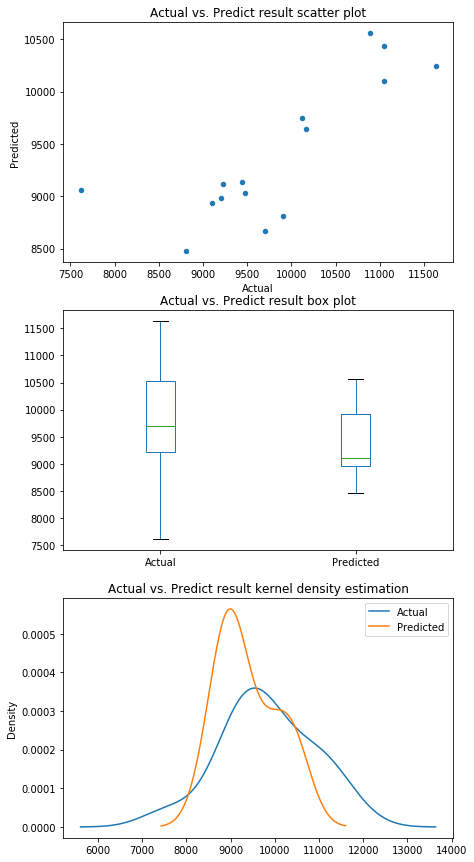

In [103]:
visualize_graph(df_pred_ANN_c)

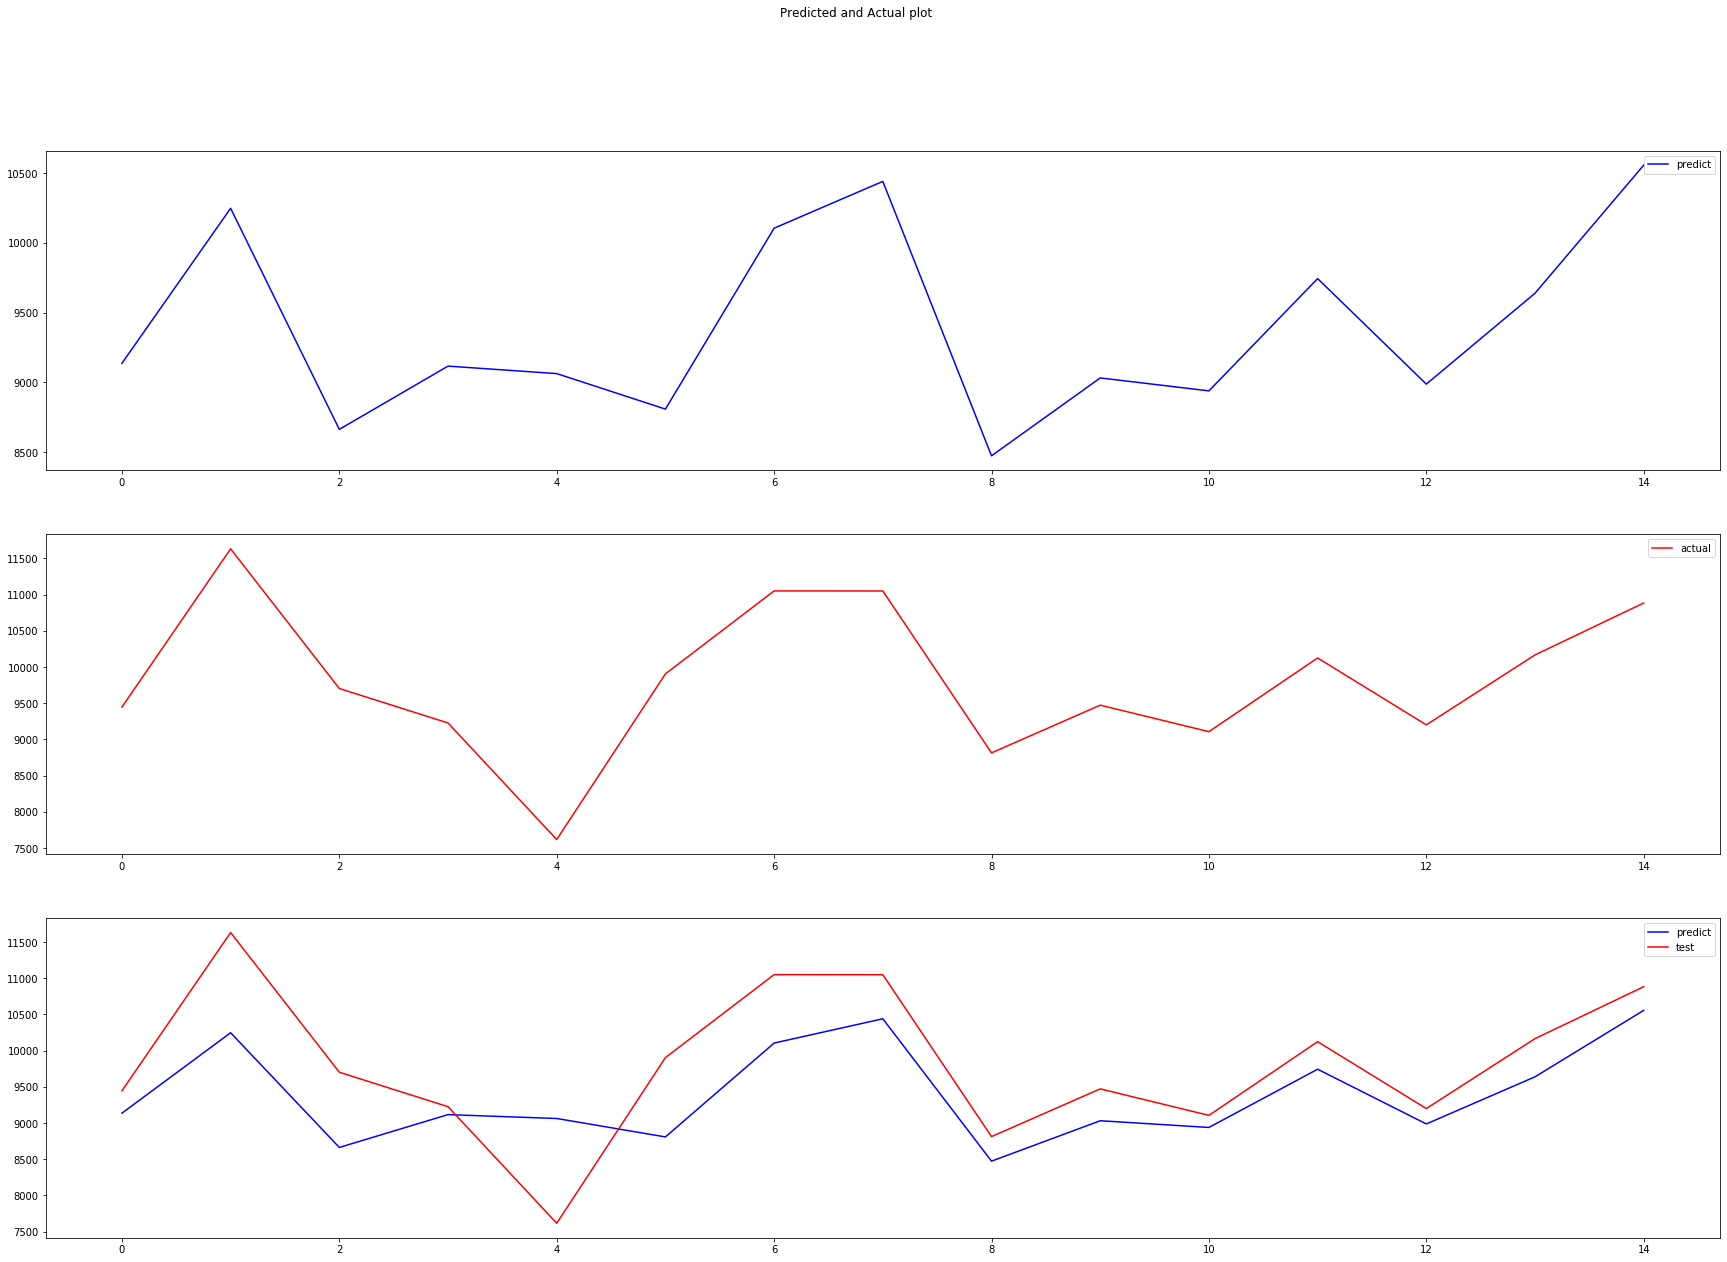

In [104]:
visualization(df_pred_ANN_c.Actual, df_pred_ANN_c.Predicted)

## Industrial Consumption Forecast

In [39]:
df_pred_i=sm_regression(X_train_i, y_train_i, X_test_i, y_test_i)

                            OLS Regression Results                            
Dep. Variable:       Industrial_Usage   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     30.32
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           1.17e-16
Time:                        10:13:50   Log-Likelihood:                -385.36
No. Observations:                  57   AIC:                             790.7
Df Residuals:                      47   BIC:                             811.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [40]:
df_pred_i

,Actual,Predicted
1904,3610,3893.363877
604,3654,3719.509540
1054,4786,4624.895120
3454,4290,4078.191199
3354,4741,4543.060574
1454,4596,4722.259752
3104,3440,3500.655159
3404,4469,4452.802941
2754,5184,4634.493256
2804,4351,4474.575442


In [41]:
evaluate_performances(df_pred_i['Actual'], df_pred_i['Predicted'])

Performance Evaluation
Mean Absolute Error: 163.70621773418821
Mean Squared Error: 44555.12381594409
Root Mean Squared Error: 211.08084663451606


# Industrial Feature Importance

xgbRegressor = XGBRegressor(objective ='reg:squarederror')
xgbRegressor.fit(X_train_i, y_train_i)

fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(xgbRegressor, height=0.8, ax=ax)

C:\Users\Maggie\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


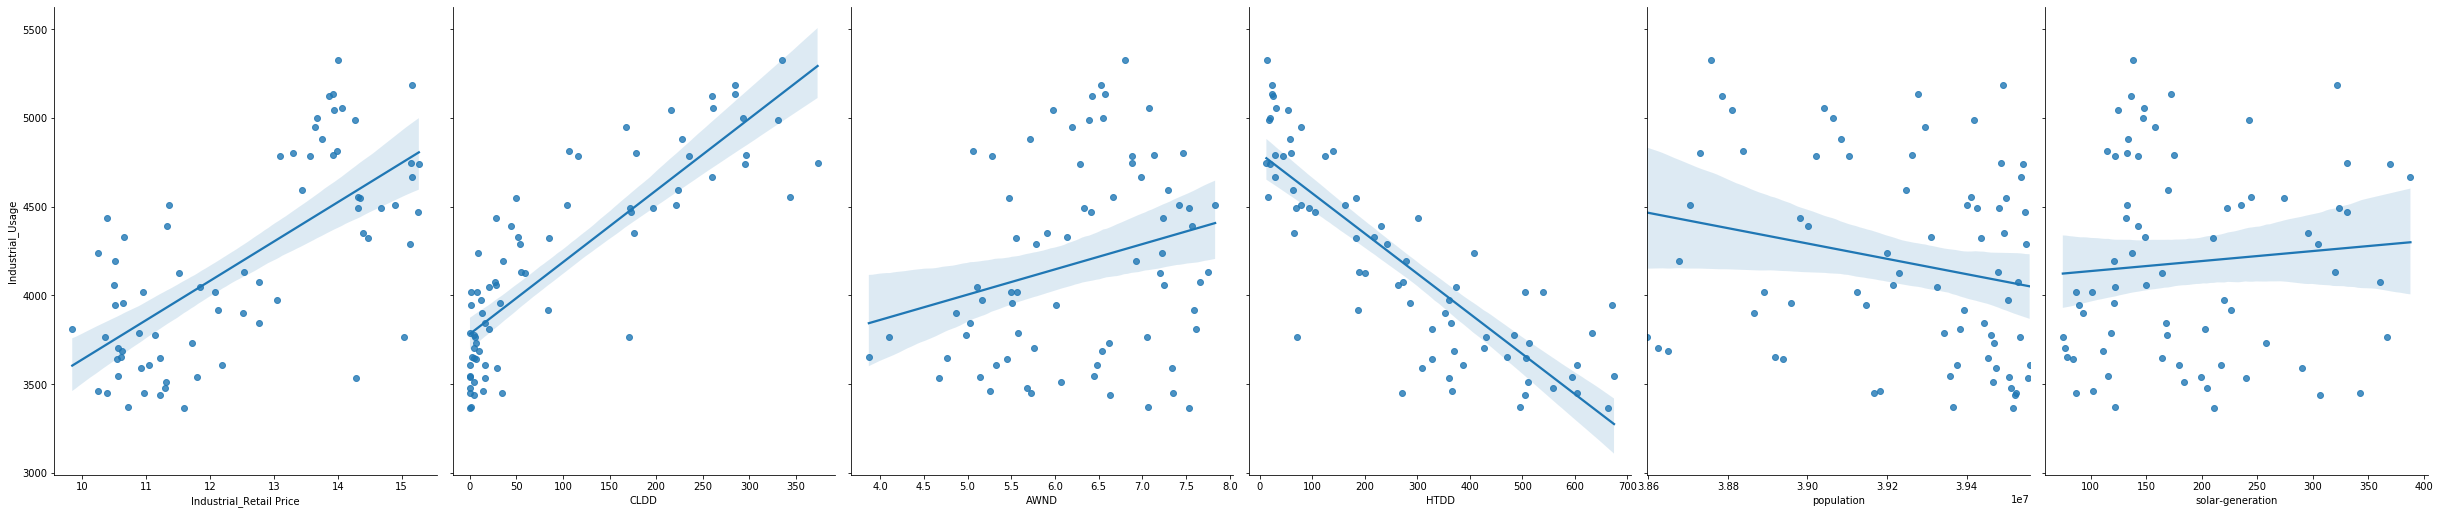

In [42]:
# Correlation Analysis
correlation_analysis(data_CA, industrial_numeric_columns_adj, ['Industrial_Usage'])

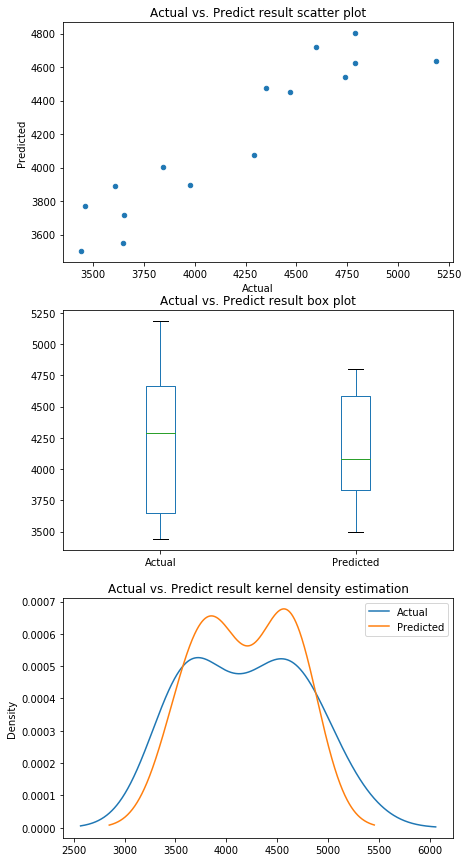

In [43]:
visualize_graph(df_pred_i)

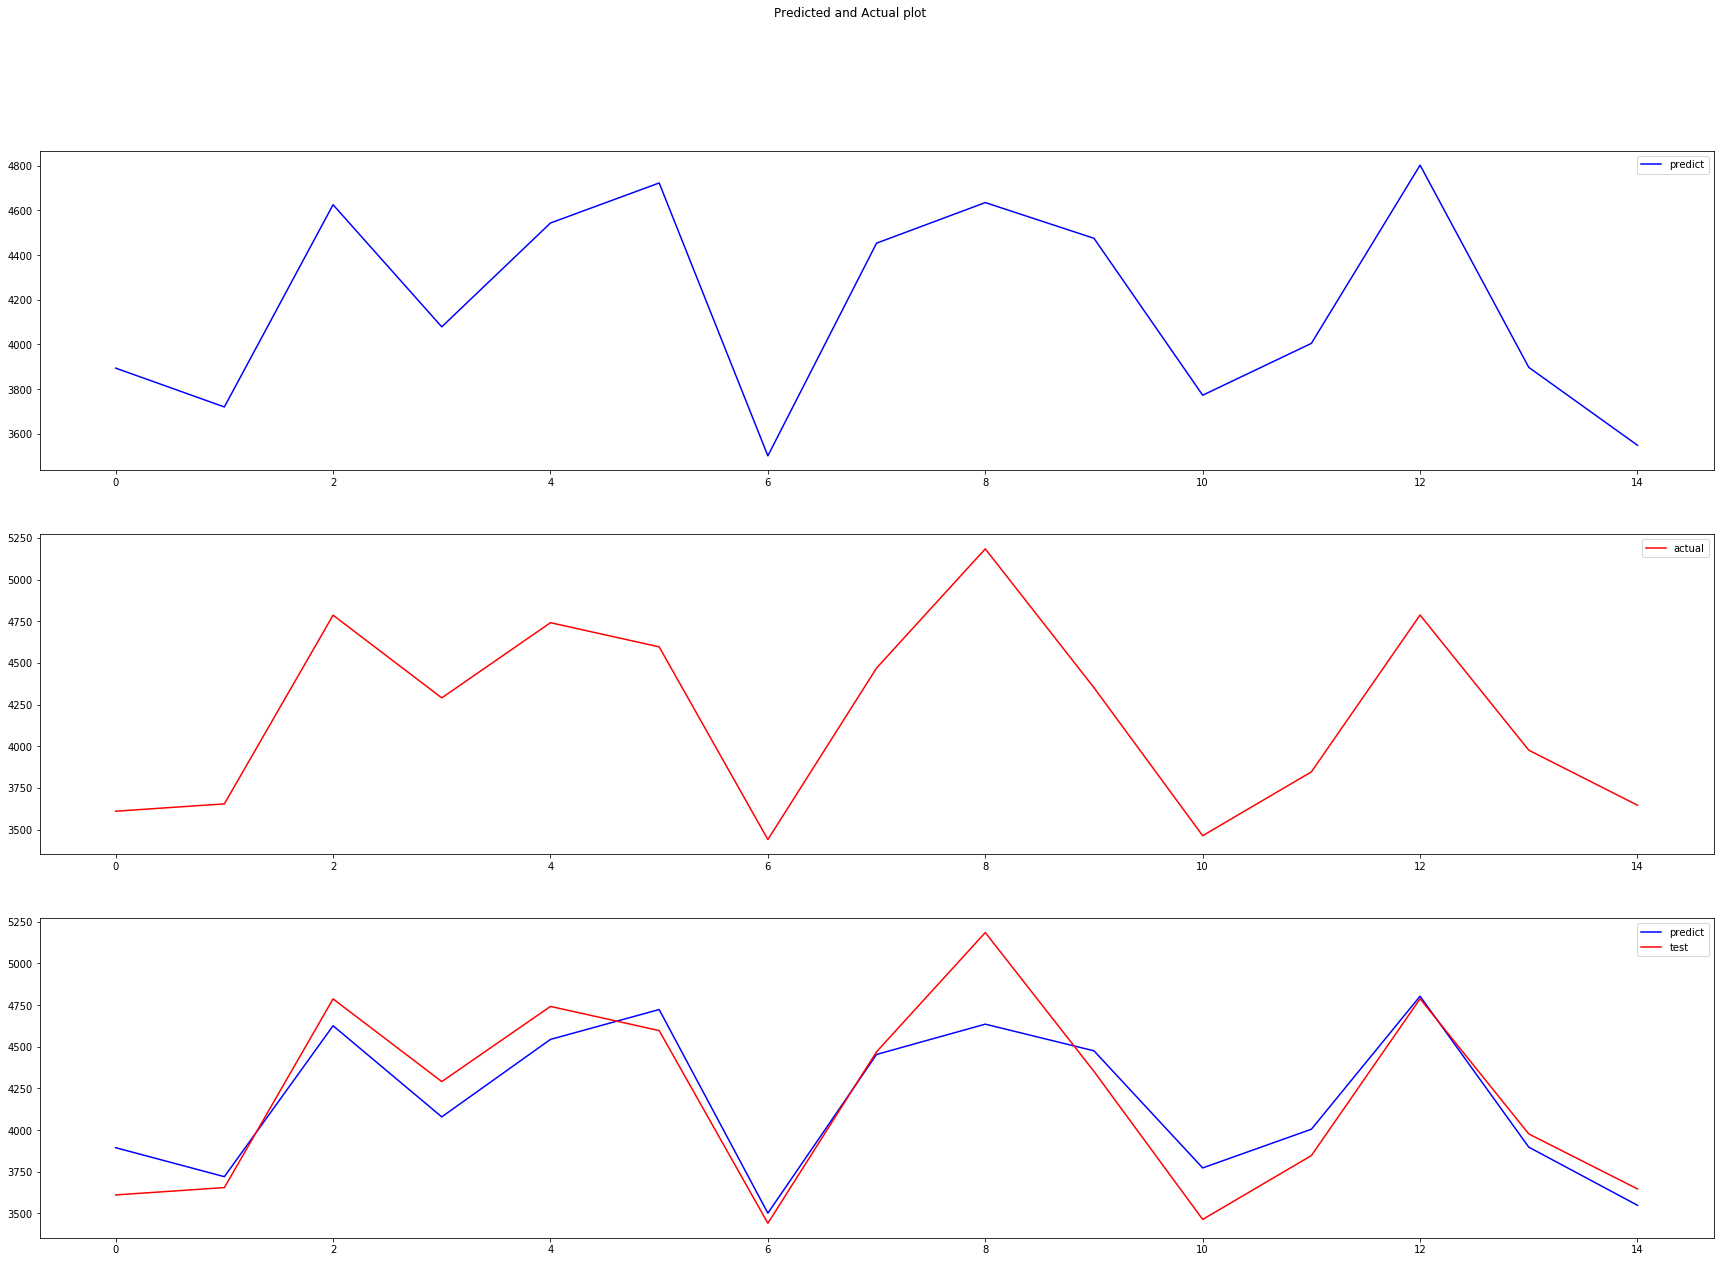

In [44]:
visualization(df_pred_i.Actual, df_pred_i.Predicted)

### Industrial_ANN

In [69]:
features_ANN_i=['Month', 'Industrial_Usage', 'CLDD', 'AWND', 'HTDD', 'population', 'solar-generation','Summer', 'Fall', 'Winter', 'Industrial_Retail Price']
#Spring is the seasonal feature baseline
data_CA_ANN=data[data.CA==1]
data_CA_ANN=data_CA_ANN[features_ANN_i]
data_CA_ANN

,Month,Industrial_Usage,CLDD,AWND,HTDD,population,solar-generation,Summer,Fall,Winter,Industrial_Retail Price
4,1,3764,5.453177,4.103704,431.618729,38596972,75,0,0,1,10.35
54,2,3705,4.722039,5.756790,427.883224,38623728,77,0,0,1,10.56
104,3,3686,9.909091,6.533750,370.069421,38650484,111,0,0,0,10.62
154,4,4196,35.576412,6.920988,279.071429,38677240,121,0,0,0,10.51
204,5,4512,103.909402,7.831646,162.741880,38703996,133,0,0,0,11.35
...,...,...,...,...,...,...,...,...,...,...,...
3354,8,4741,295.693405,6.280519,19.834225,39541760,370,1,0,0,15.27
3404,9,4469,173.529946,6.409333,104.963702,39545980,331,0,1,0,15.26
3454,10,4290,53.797422,5.787838,241.716390,39550199,305,0,1,0,15.13
3504,11,3537,16.246801,4.672000,359.775137,39554419,240,0,1,0,14.28


In [70]:
train_ANN, test_ANN = train_test_split(data_CA_ANN, test_size=0.2)
X_train_ANN_i, y_train_ANN_i = x_y_split(train_ANN, 'Industrial_Usage', ['Industrial_Usage'])
X_test_ANN_i,y_test_ANN_i = x_y_split(test_ANN, 'Industrial_Usage', ['Industrial_Usage'])

In [71]:
X_train_ANN_i, X_test_ANN_i = minmax_scaler(X_train_ANN_i, X_test_ANN_i, industrial_numeric_columns_adj)
y_train_ANN_i = (y_train_ANN_i - min(y_train_ANN_i))/(max(y_train_ANN_i) - min(y_train_ANN_i))

In [72]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X_train_ANN_i, y_train_ANN_i, validation_split = 0.2, batch_size = 10, epochs = 1000)

Train on 45 samples, validate on 12 samples
Epoch 1/1000
45/45 [==============================] - 1s 16ms/sample - loss: 0.0885 - mae: 0.2567 - val_loss: 0.0676 - val_mae: 0.2187
Epoch 2/1000
45/45 [==============================] - 0s 555us/sample - loss: 0.0882 - mae: 0.2561 - val_loss: 0.0676 - val_mae: 0.2187
Epoch 3/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0878 - mae: 0.2557 - val_loss: 0.0676 - val_mae: 0.2187
Epoch 4/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0875 - mae: 0.2552 - val_loss: 0.0677 - val_mae: 0.2187
Epoch 5/1000
45/45 [==============================] - 0s 533us/sample - loss: 0.0871 - mae: 0.2547 - val_loss: 0.0677 - val_mae: 0.2186
Epoch 6/1000
45/45 [==============================] - 0s 533us/sample - loss: 0.0868 - mae: 0.2543 - val_loss: 0.0678 - val_mae: 0.2186
Epoch 7/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0864 - mae: 0.2539 - val_loss: 0.0678 - val_mae: 0.2184
Epoch

45/45 [==============================] - 0s 510us/sample - loss: 0.0335 - mae: 0.1447 - val_loss: 0.0520 - val_mae: 0.1920
Epoch 60/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0331 - mae: 0.1431 - val_loss: 0.0515 - val_mae: 0.1912
Epoch 61/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0325 - mae: 0.1413 - val_loss: 0.0505 - val_mae: 0.1888
Epoch 62/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0321 - mae: 0.1398 - val_loss: 0.0498 - val_mae: 0.1872
Epoch 63/1000
45/45 [==============================] - 0s 466us/sample - loss: 0.0316 - mae: 0.1383 - val_loss: 0.0490 - val_mae: 0.1854
Epoch 64/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0312 - mae: 0.1370 - val_loss: 0.0483 - val_mae: 0.1840
Epoch 65/1000
45/45 [==============================] - 0s 509us/sample - loss: 0.0307 - mae: 0.1356 - val_loss: 0.0477 - val_mae: 0.1829
Epoch 66/1000
45/45 [==============================] - 

45/45 [==============================] - 0s 488us/sample - loss: 0.0179 - mae: 0.0969 - val_loss: 0.0265 - val_mae: 0.1327
Epoch 119/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0178 - mae: 0.0970 - val_loss: 0.0265 - val_mae: 0.1326
Epoch 120/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0177 - mae: 0.0965 - val_loss: 0.0261 - val_mae: 0.1318
Epoch 121/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0176 - mae: 0.0960 - val_loss: 0.0252 - val_mae: 0.1292
Epoch 122/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0173 - mae: 0.0945 - val_loss: 0.0245 - val_mae: 0.1270
Epoch 123/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0172 - mae: 0.0943 - val_loss: 0.0242 - val_mae: 0.1263
Epoch 124/1000
45/45 [==============================] - 0s 466us/sample - loss: 0.0171 - mae: 0.0941 - val_loss: 0.0237 - val_mae: 0.1247
Epoch 125/1000
45/45 [===========================

45/45 [==============================] - 0s 509us/sample - loss: 0.0125 - mae: 0.0806 - val_loss: 0.0162 - val_mae: 0.1032
Epoch 178/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0124 - mae: 0.0806 - val_loss: 0.0163 - val_mae: 0.1036
Epoch 179/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0124 - mae: 0.0804 - val_loss: 0.0165 - val_mae: 0.1041
Epoch 180/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0123 - mae: 0.0804 - val_loss: 0.0163 - val_mae: 0.1035
Epoch 181/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0122 - mae: 0.0801 - val_loss: 0.0165 - val_mae: 0.1042
Epoch 182/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0123 - mae: 0.0809 - val_loss: 0.0167 - val_mae: 0.1047
Epoch 183/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0122 - mae: 0.0804 - val_loss: 0.0159 - val_mae: 0.1017
Epoch 184/1000
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0108 - mae: 0.0749 - val_loss: 0.0143 - val_mae: 0.0938
Epoch 237/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0108 - mae: 0.0750 - val_loss: 0.0143 - val_mae: 0.0937
Epoch 238/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0108 - mae: 0.0749 - val_loss: 0.0144 - val_mae: 0.0945
Epoch 239/1000
45/45 [==============================] - 0s 466us/sample - loss: 0.0108 - mae: 0.0750 - val_loss: 0.0142 - val_mae: 0.0936
Epoch 240/1000
45/45 [==============================] - 0s 466us/sample - loss: 0.0108 - mae: 0.0749 - val_loss: 0.0143 - val_mae: 0.0939
Epoch 241/1000
45/45 [==============================] - 0s 509us/sample - loss: 0.0107 - mae: 0.0749 - val_loss: 0.0144 - val_mae: 0.0943
Epoch 242/1000
45/45 [==============================] - 0s 442us/sample - loss: 0.0108 - mae: 0.0752 - val_loss: 0.0146 - val_mae: 0.0952
Epoch 243/1000
45/45 [===========================

45/45 [==============================] - 0s 554us/sample - loss: 0.0101 - mae: 0.0733 - val_loss: 0.0137 - val_mae: 0.0912
Epoch 296/1000
45/45 [==============================] - 0s 598us/sample - loss: 0.0100 - mae: 0.0731 - val_loss: 0.0143 - val_mae: 0.0932
Epoch 297/1000
45/45 [==============================] - 0s 598us/sample - loss: 0.0103 - mae: 0.0737 - val_loss: 0.0145 - val_mae: 0.0938
Epoch 298/1000
45/45 [==============================] - 0s 709us/sample - loss: 0.0103 - mae: 0.0737 - val_loss: 0.0142 - val_mae: 0.0929
Epoch 299/1000
45/45 [==============================] - 0s 598us/sample - loss: 0.0100 - mae: 0.0729 - val_loss: 0.0132 - val_mae: 0.0892
Epoch 300/1000
45/45 [==============================] - 0s 687us/sample - loss: 0.0102 - mae: 0.0750 - val_loss: 0.0124 - val_mae: 0.0862
Epoch 301/1000
45/45 [==============================] - 0s 621us/sample - loss: 0.0104 - mae: 0.0764 - val_loss: 0.0124 - val_mae: 0.0861
Epoch 302/1000
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0098 - mae: 0.0728 - val_loss: 0.0125 - val_mae: 0.0855
Epoch 355/1000
45/45 [==============================] - 0s 620us/sample - loss: 0.0097 - mae: 0.0724 - val_loss: 0.0125 - val_mae: 0.0854
Epoch 356/1000
45/45 [==============================] - 0s 576us/sample - loss: 0.0097 - mae: 0.0725 - val_loss: 0.0124 - val_mae: 0.0852
Epoch 357/1000
45/45 [==============================] - 0s 643us/sample - loss: 0.0098 - mae: 0.0724 - val_loss: 0.0124 - val_mae: 0.0849
Epoch 358/1000
45/45 [==============================] - 0s 621us/sample - loss: 0.0097 - mae: 0.0726 - val_loss: 0.0119 - val_mae: 0.0835
Epoch 359/1000
45/45 [==============================] - 0s 687us/sample - loss: 0.0097 - mae: 0.0728 - val_loss: 0.0119 - val_mae: 0.0834
Epoch 360/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0098 - mae: 0.0728 - val_loss: 0.0122 - val_mae: 0.0842
Epoch 361/1000
45/45 [===========================

45/45 [==============================] - 0s 532us/sample - loss: 0.0095 - mae: 0.0722 - val_loss: 0.0113 - val_mae: 0.0799
Epoch 414/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0097 - mae: 0.0720 - val_loss: 0.0122 - val_mae: 0.0825
Epoch 415/1000
45/45 [==============================] - 0s 511us/sample - loss: 0.0096 - mae: 0.0726 - val_loss: 0.0120 - val_mae: 0.0815
Epoch 416/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0094 - mae: 0.0720 - val_loss: 0.0115 - val_mae: 0.0798
Epoch 417/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0095 - mae: 0.0726 - val_loss: 0.0109 - val_mae: 0.0787
Epoch 418/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0094 - mae: 0.0725 - val_loss: 0.0109 - val_mae: 0.0788
Epoch 419/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0094 - mae: 0.0724 - val_loss: 0.0112 - val_mae: 0.0793
Epoch 420/1000
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0091 - mae: 0.0705 - val_loss: 0.0107 - val_mae: 0.0759
Epoch 473/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0090 - mae: 0.0705 - val_loss: 0.0103 - val_mae: 0.0756
Epoch 474/1000
45/45 [==============================] - 0s 466us/sample - loss: 0.0092 - mae: 0.0718 - val_loss: 0.0102 - val_mae: 0.0755
Epoch 475/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0092 - mae: 0.0715 - val_loss: 0.0105 - val_mae: 0.0754
Epoch 476/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0091 - mae: 0.0711 - val_loss: 0.0107 - val_mae: 0.0757
Epoch 477/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0090 - mae: 0.0706 - val_loss: 0.0112 - val_mae: 0.0767
Epoch 478/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0093 - mae: 0.0719 - val_loss: 0.0117 - val_mae: 0.0780
Epoch 479/1000
45/45 [===========================

45/45 [==============================] - 0s 576us/sample - loss: 0.0090 - mae: 0.0705 - val_loss: 0.0106 - val_mae: 0.0745
Epoch 532/1000
45/45 [==============================] - 0s 576us/sample - loss: 0.0089 - mae: 0.0703 - val_loss: 0.0103 - val_mae: 0.0738
Epoch 533/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0089 - mae: 0.0704 - val_loss: 0.0102 - val_mae: 0.0737
Epoch 534/1000
45/45 [==============================] - 0s 576us/sample - loss: 0.0089 - mae: 0.0705 - val_loss: 0.0103 - val_mae: 0.0736
Epoch 535/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0089 - mae: 0.0705 - val_loss: 0.0103 - val_mae: 0.0735
Epoch 536/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0089 - mae: 0.0707 - val_loss: 0.0101 - val_mae: 0.0735
Epoch 537/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0090 - mae: 0.0712 - val_loss: 0.0098 - val_mae: 0.0736
Epoch 538/1000
45/45 [===========================

45/45 [==============================] - 0s 576us/sample - loss: 0.0089 - mae: 0.0698 - val_loss: 0.0096 - val_mae: 0.0731
Epoch 591/1000
45/45 [==============================] - 0s 576us/sample - loss: 0.0089 - mae: 0.0707 - val_loss: 0.0099 - val_mae: 0.0730
Epoch 592/1000
45/45 [==============================] - 0s 554us/sample - loss: 0.0088 - mae: 0.0696 - val_loss: 0.0102 - val_mae: 0.0729
Epoch 593/1000
45/45 [==============================] - 0s 554us/sample - loss: 0.0088 - mae: 0.0697 - val_loss: 0.0103 - val_mae: 0.0727
Epoch 594/1000
45/45 [==============================] - 0s 554us/sample - loss: 0.0087 - mae: 0.0697 - val_loss: 0.0100 - val_mae: 0.0726
Epoch 595/1000
45/45 [==============================] - 0s 554us/sample - loss: 0.0087 - mae: 0.0697 - val_loss: 0.0099 - val_mae: 0.0724
Epoch 596/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0087 - mae: 0.0697 - val_loss: 0.0100 - val_mae: 0.0724
Epoch 597/1000
45/45 [===========================

45/45 [==============================] - 0s 554us/sample - loss: 0.0086 - mae: 0.0694 - val_loss: 0.0101 - val_mae: 0.0718
Epoch 650/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0087 - mae: 0.0702 - val_loss: 0.0107 - val_mae: 0.0727
Epoch 651/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0087 - mae: 0.0707 - val_loss: 0.0104 - val_mae: 0.0720
Epoch 652/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0088 - mae: 0.0704 - val_loss: 0.0099 - val_mae: 0.0719
Epoch 653/1000
45/45 [==============================] - 0s 554us/sample - loss: 0.0086 - mae: 0.0693 - val_loss: 0.0099 - val_mae: 0.0720
Epoch 654/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0086 - mae: 0.0693 - val_loss: 0.0098 - val_mae: 0.0720
Epoch 655/1000
45/45 [==============================] - 0s 643us/sample - loss: 0.0086 - mae: 0.0693 - val_loss: 0.0099 - val_mae: 0.0719
Epoch 656/1000
45/45 [===========================

45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0694 - val_loss: 0.0100 - val_mae: 0.0719
Epoch 709/1000
45/45 [==============================] - 0s 530us/sample - loss: 0.0087 - mae: 0.0695 - val_loss: 0.0096 - val_mae: 0.0719
Epoch 710/1000
45/45 [==============================] - 0s 576us/sample - loss: 0.0086 - mae: 0.0691 - val_loss: 0.0098 - val_mae: 0.0717
Epoch 711/1000
45/45 [==============================] - 0s 621us/sample - loss: 0.0085 - mae: 0.0692 - val_loss: 0.0099 - val_mae: 0.0715
Epoch 712/1000
45/45 [==============================] - 0s 620us/sample - loss: 0.0087 - mae: 0.0706 - val_loss: 0.0104 - val_mae: 0.0715
Epoch 713/1000
45/45 [==============================] - 0s 731us/sample - loss: 0.0089 - mae: 0.0711 - val_loss: 0.0099 - val_mae: 0.0713
Epoch 714/1000
45/45 [==============================] - 0s 665us/sample - loss: 0.0085 - mae: 0.0696 - val_loss: 0.0099 - val_mae: 0.0713
Epoch 715/1000
45/45 [===========================

45/45 [==============================] - 0s 532us/sample - loss: 0.0086 - mae: 0.0701 - val_loss: 0.0102 - val_mae: 0.0708
Epoch 768/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0692 - val_loss: 0.0097 - val_mae: 0.0709
Epoch 769/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0686 - val_loss: 0.0097 - val_mae: 0.0709
Epoch 770/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0686 - val_loss: 0.0098 - val_mae: 0.0708
Epoch 771/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0087 - mae: 0.0694 - val_loss: 0.0095 - val_mae: 0.0708
Epoch 772/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0087 - mae: 0.0698 - val_loss: 0.0102 - val_mae: 0.0704
Epoch 773/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0086 - mae: 0.0700 - val_loss: 0.0100 - val_mae: 0.0704
Epoch 774/1000
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0704 - val_loss: 0.0101 - val_mae: 0.0697
Epoch 827/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0704 - val_loss: 0.0097 - val_mae: 0.0697
Epoch 828/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0084 - mae: 0.0695 - val_loss: 0.0095 - val_mae: 0.0697
Epoch 829/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0084 - mae: 0.0684 - val_loss: 0.0093 - val_mae: 0.0698
Epoch 830/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0689 - val_loss: 0.0093 - val_mae: 0.0696
Epoch 831/1000
45/45 [==============================] - 0s 510us/sample - loss: 0.0085 - mae: 0.0689 - val_loss: 0.0094 - val_mae: 0.0694
Epoch 832/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0085 - mae: 0.0695 - val_loss: 0.0102 - val_mae: 0.0703
Epoch 833/1000
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0085 - mae: 0.0705 - val_loss: 0.0098 - val_mae: 0.0688
Epoch 886/1000
45/45 [==============================] - 0s 509us/sample - loss: 0.0085 - mae: 0.0696 - val_loss: 0.0093 - val_mae: 0.0691
Epoch 887/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0084 - mae: 0.0685 - val_loss: 0.0093 - val_mae: 0.0691
Epoch 888/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0086 - mae: 0.0703 - val_loss: 0.0096 - val_mae: 0.0691
Epoch 889/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0085 - mae: 0.0689 - val_loss: 0.0092 - val_mae: 0.0691
Epoch 890/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0084 - mae: 0.0683 - val_loss: 0.0093 - val_mae: 0.0689
Epoch 891/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0085 - mae: 0.0693 - val_loss: 0.0097 - val_mae: 0.0688
Epoch 892/1000
45/45 [===========================

45/45 [==============================] - 0s 532us/sample - loss: 0.0084 - mae: 0.0688 - val_loss: 0.0093 - val_mae: 0.0693
Epoch 945/1000
45/45 [==============================] - 0s 533us/sample - loss: 0.0085 - mae: 0.0694 - val_loss: 0.0095 - val_mae: 0.0693
Epoch 946/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0084 - mae: 0.0693 - val_loss: 0.0092 - val_mae: 0.0695
Epoch 947/1000
45/45 [==============================] - 0s 532us/sample - loss: 0.0084 - mae: 0.0686 - val_loss: 0.0093 - val_mae: 0.0694
Epoch 948/1000
45/45 [==============================] - 0s 488us/sample - loss: 0.0084 - mae: 0.0694 - val_loss: 0.0095 - val_mae: 0.0693
Epoch 949/1000
45/45 [==============================] - 0s 487us/sample - loss: 0.0084 - mae: 0.0692 - val_loss: 0.0093 - val_mae: 0.0691
Epoch 950/1000
45/45 [==============================] - 0s 465us/sample - loss: 0.0084 - mae: 0.0699 - val_loss: 0.0097 - val_mae: 0.0689
Epoch 951/1000
45/45 [===========================

In [73]:
# Predicting the Test set results
predictions_ANN_i = classifier.predict(X_test_ANN_i)
# Scale y back 
predictions_ANN_i = (predictions_ANN_i * (max(y_test_ANN_i) - min(y_test_ANN_i))) + min(y_test_ANN_i)
predictions_ANN_i = predictions_ANN_i.reshape(-1)
df_pred_ANN_i = pd.DataFrame({'Actual': y_test_ANN_i, 'Predicted': predictions_ANN_i})

In [74]:
df_pred_ANN_i

,Actual,Predicted
254,4803,4730.872070
1004,4883,4829.789062
3354,4741,4666.401855
3154,3453,3753.400391
2854,4549,4083.401855
2104,4556,4782.298828
504,3902,4262.886230
1554,5138,4798.626465
1804,3547,3503.232666
954,5001,4841.086426


In [75]:
evaluate_performances(y_test_ANN_i, predictions_ANN_i)

Performance Evaluation
Mean Absolute Error: 173.302099609375
Mean Squared Error: 48948.00929119984
Root Mean Squared Error: 221.24197000388475


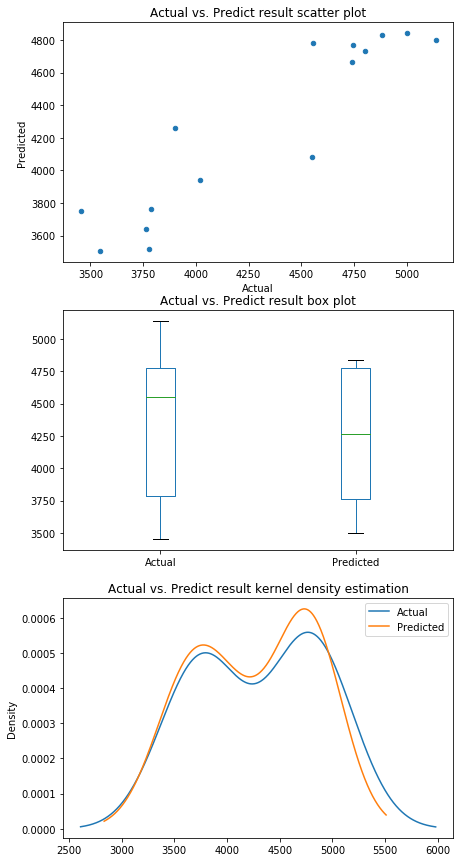

In [76]:
visualize_graph(df_pred_ANN_i)

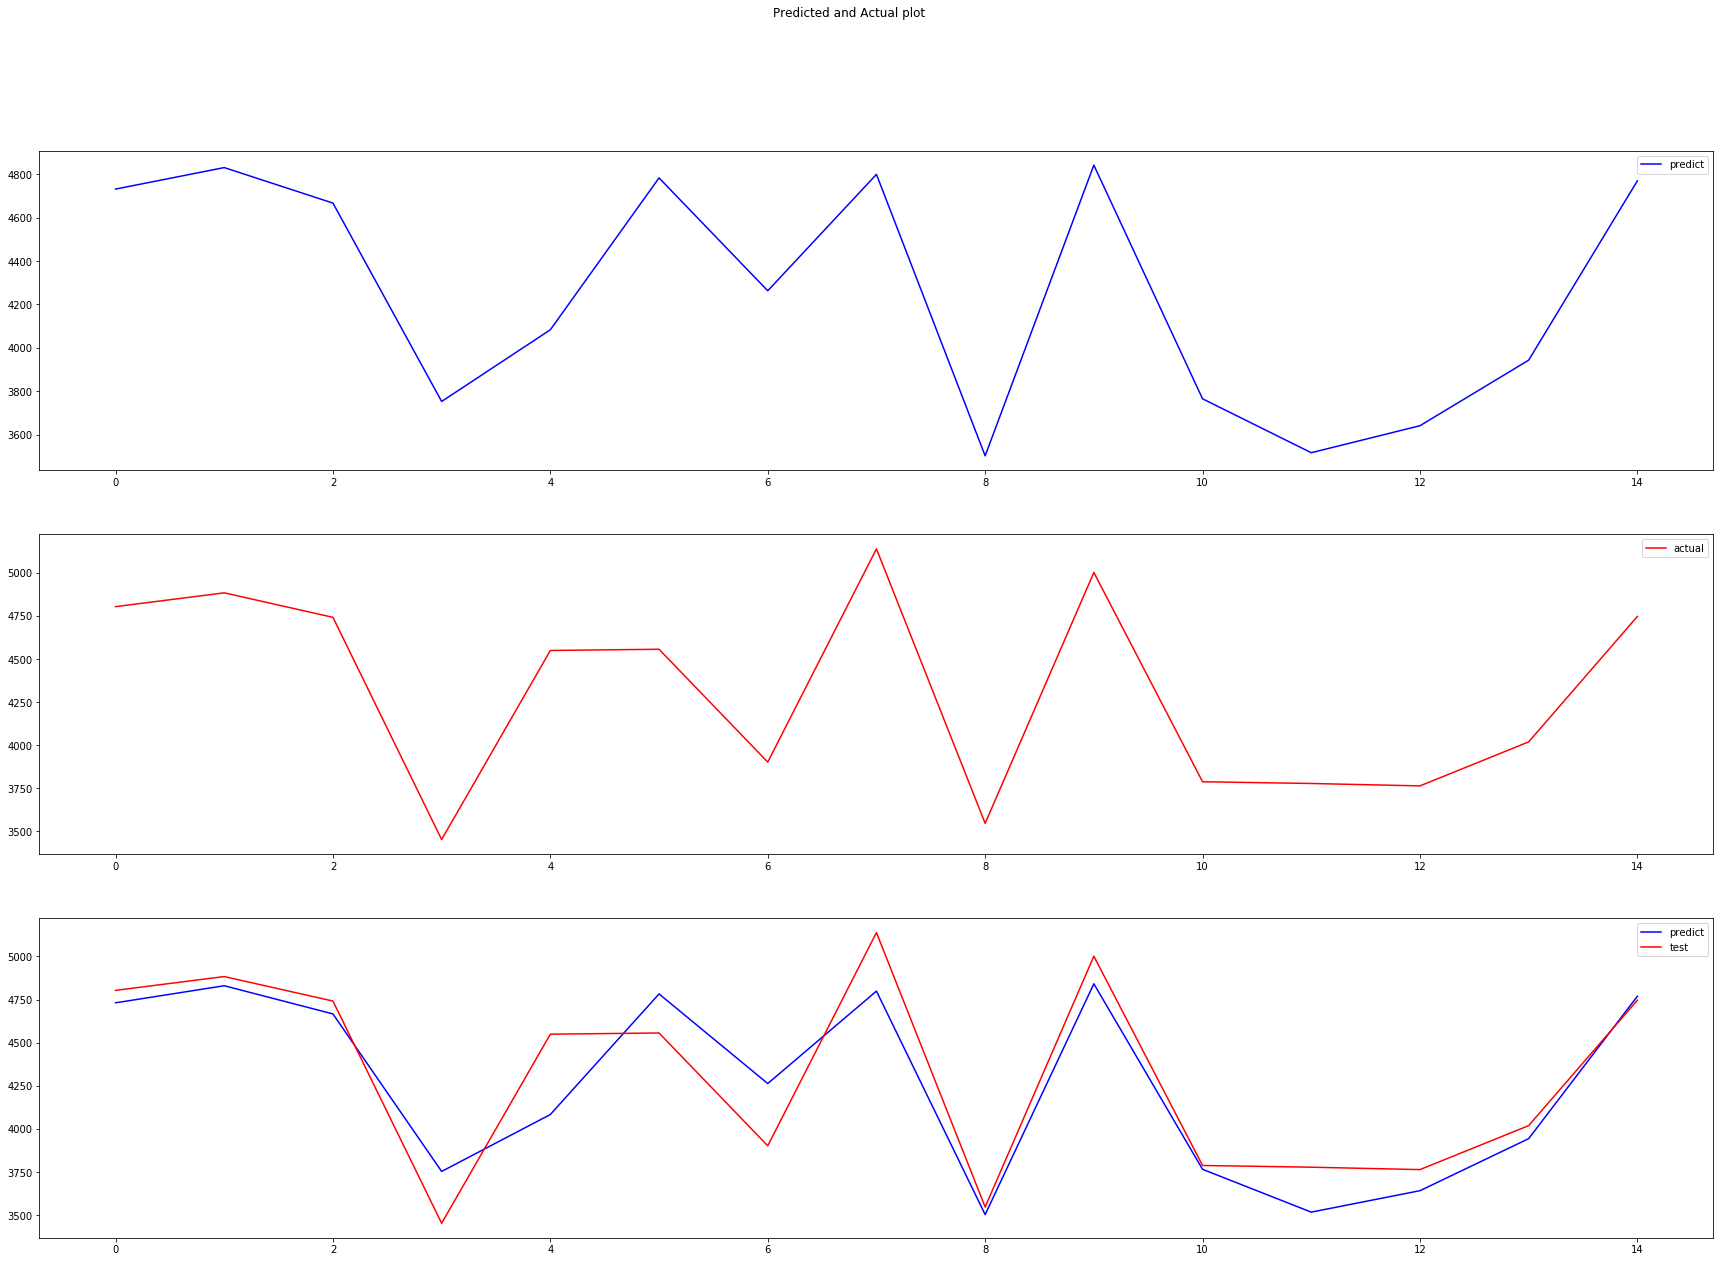

In [77]:
visualization(df_pred_ANN_i.Actual, df_pred_ANN_i.Predicted)

## Residential Consumption Forecast

In [54]:
df_pred_r=sm_regression(X_train_r, y_train_r, X_test_r, y_test_r)

                            OLS Regression Results                            
Dep. Variable:      Residential_Usage   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     27.46
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           7.97e-16
Time:                        10:14:21   Log-Likelihood:                -439.54
No. Observations:                  57   AIC:                             899.1
Df Residuals:                      47   BIC:                             919.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
df_pred_r

,Actual,Predicted
1904,6601.0,6300.484491
604,7594.0,7518.382936
1054,8418.0,7691.834794
3454,7204.0,6731.972854
3354,10054.0,9408.850713
1454,7568.0,7952.451896
3104,6718.0,6347.763418
3404,8450.0,8138.066420
2754,12227.0,9152.677061
2804,6997.0,8291.576103


In [56]:
evaluate_performances(df_pred_r['Actual'], df_pred_r['Predicted'])

Performance Evaluation
Mean Absolute Error: 692.4154412843594
Mean Squared Error: 980279.9303469631
Root Mean Squared Error: 990.090869742249


## Residential_Feature Importance

xgbRegressor = XGBRegressor(objective ='reg:squarederror')
xgbRegressor.fit(X_train_r, y_train_r)

fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(xgbRegressor, height=0.8, ax=ax)

C:\Users\Maggie\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


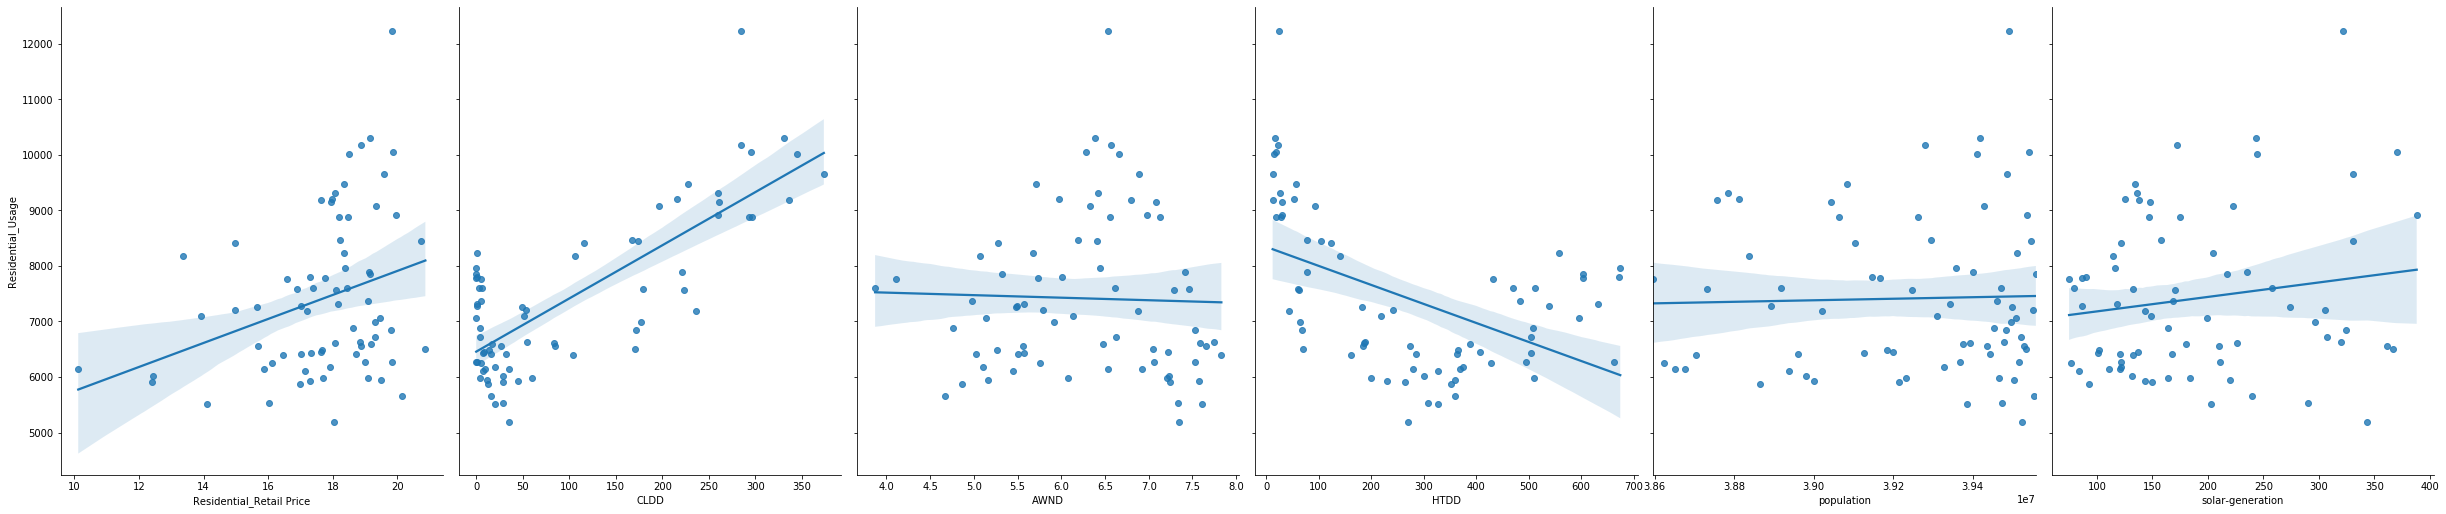

In [57]:
# Correlation Analysis
correlation_analysis(data_CA, residential_numeric_columns_adj, ['Residential_Usage'])

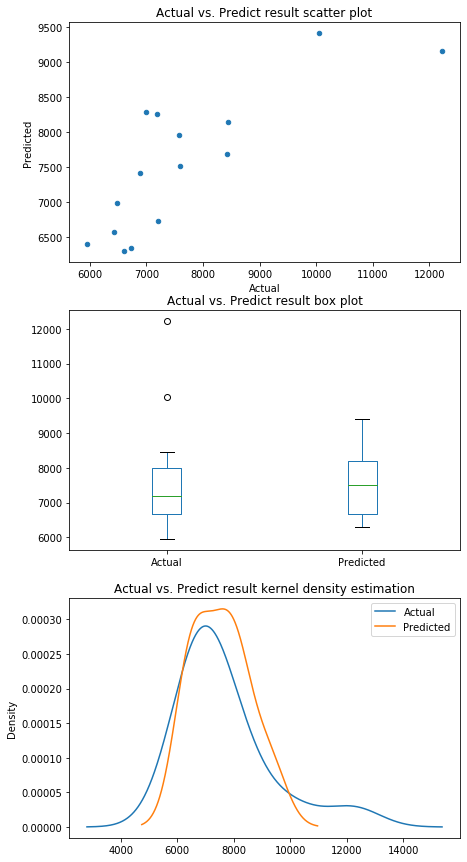

In [58]:
visualize_graph(df_pred_r)

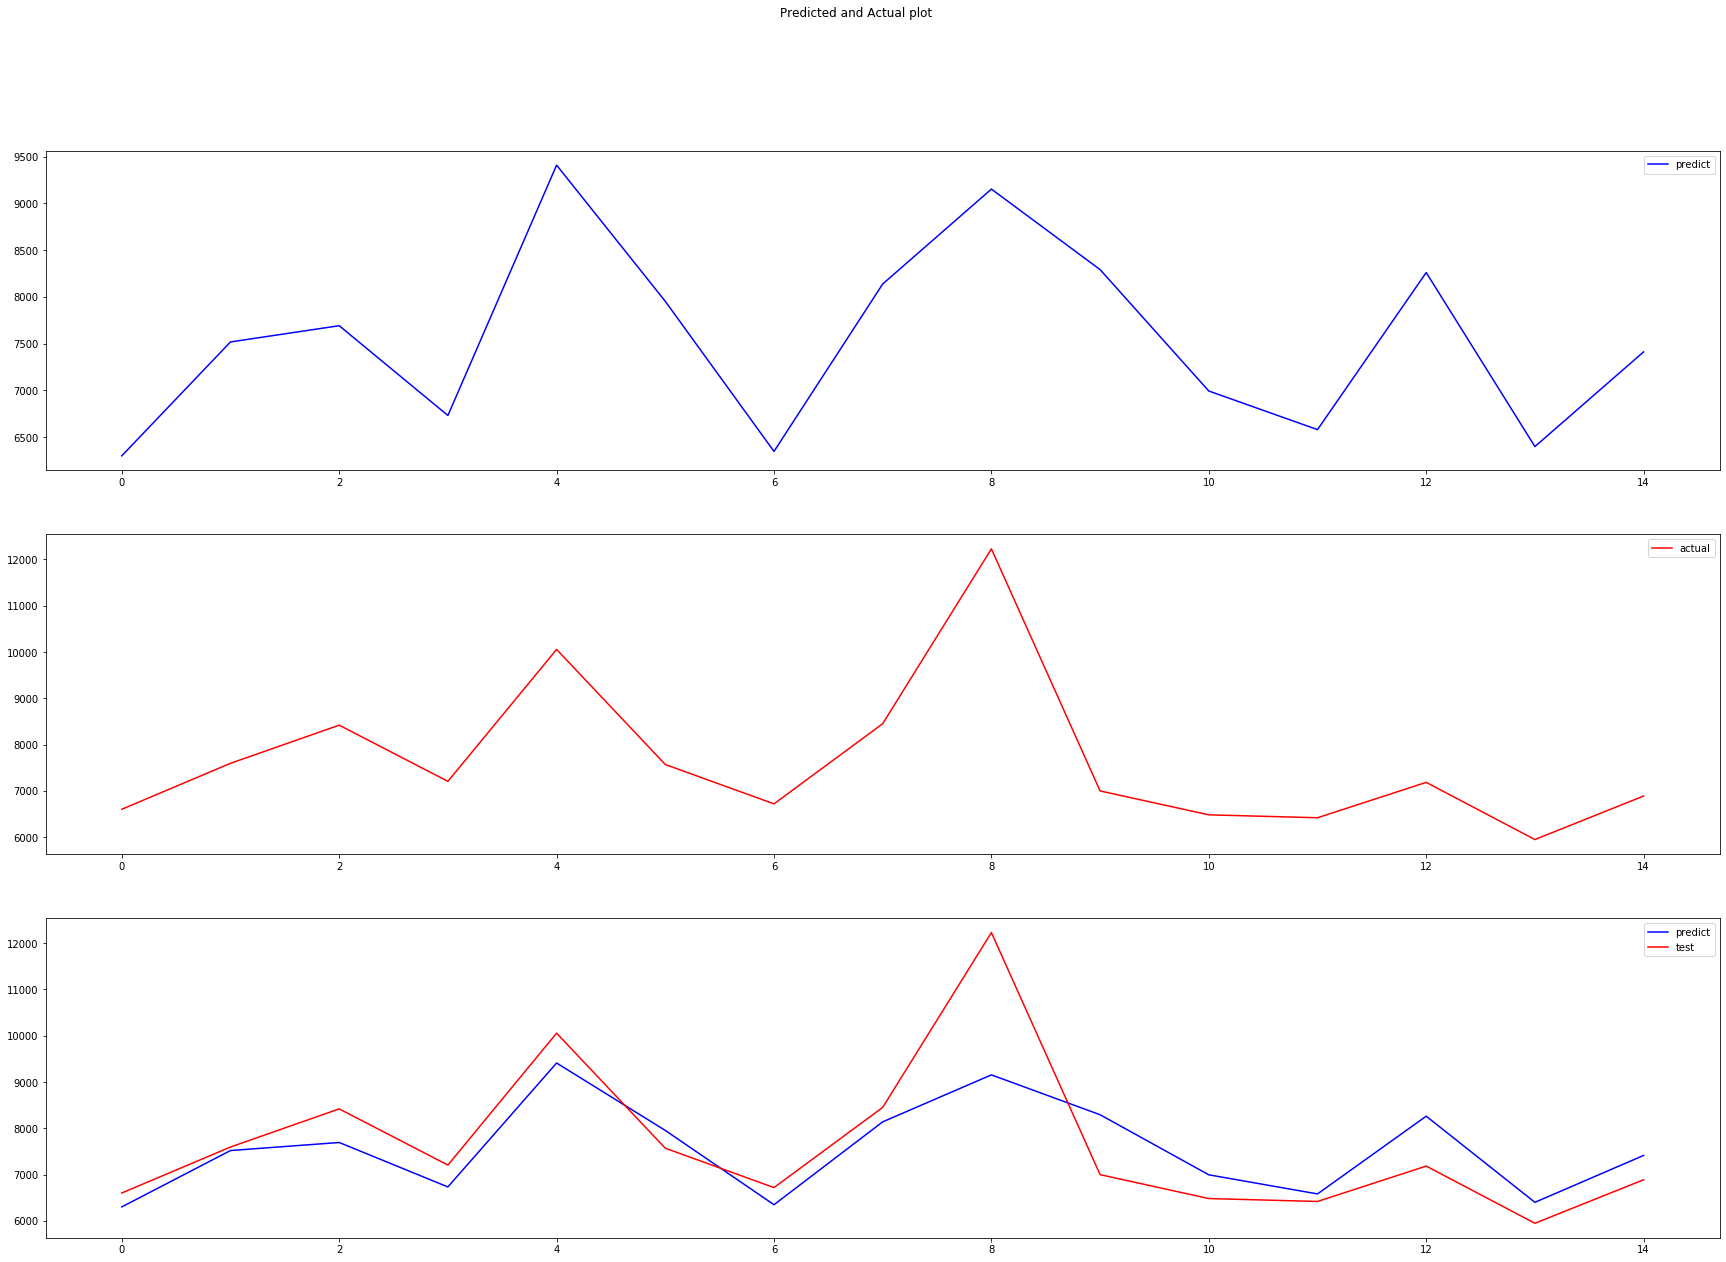

In [59]:
visualization(df_pred_r.Actual, df_pred_r.Predicted)

### Residential_ANN

In [60]:
features_ANN_r=['Month', 'Residential_Usage', 'CLDD', 'AWND', 'HTDD', 'population', 'solar-generation','Summer', 'Fall', 'Winter', 'Residential_Retail Price']
#Spring is the seasonal feature baseline
data_CA_ANN=data[data.CA==1]
data_CA_ANN=data_CA_ANN[features_ANN_r]
data_CA_ANN


,Month,Residential_Usage,CLDD,AWND,HTDD,population,solar-generation,Summer,Fall,Winter,Residential_Retail Price
4,1,7773.0,5.453177,4.103704,431.618729,38596972,75,0,0,1,16.57
54,2,6260.0,4.722039,5.756790,427.883224,38623728,77,0,0,1,16.11
104,3,6152.0,9.909091,6.533750,370.069421,38650484,111,0,0,0,15.86
154,4,6146.0,35.576412,6.920988,279.071429,38677240,121,0,0,0,10.12
204,5,6399.0,103.909402,7.831646,162.741880,38703996,133,0,0,0,16.46
...,...,...,...,...,...,...,...,...,...,...,...
3354,8,10054.0,295.693405,6.280519,19.834225,39541760,370,1,0,0,19.86
3404,9,8450.0,173.529946,6.409333,104.963702,39545980,331,0,1,0,20.72
3454,10,7204.0,53.797422,5.787838,241.716390,39550199,305,0,1,0,14.97
3504,11,5667.0,16.246801,4.672000,359.775137,39554419,240,0,1,0,20.14


In [61]:
train_ANN, test_ANN = train_test_split(data_CA_ANN, test_size=0.2)
X_train_ANN_r, y_train_ANN_r = x_y_split(train_ANN, 'Residential_Usage', ['Residential_Usage'])
X_test_ANN_r,y_test_ANN_r = x_y_split(test_ANN, 'Residential_Usage', ['Residential_Usage'])


In [62]:
X_train_ANN_r, X_test_ANN_r = minmax_scaler(X_train_ANN_r, X_test_ANN_r, residential_numeric_columns_adj)
y_train_ANN_r = (y_train_ANN_r - min(y_train_ANN_r))/(max(y_train_ANN_r) - min(y_train_ANN_r))


In [63]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X_train_ANN_r, y_train_ANN_r, validation_split = 0.2, batch_size = 10, epochs = 1200)


Train on 45 samples, validate on 12 samples
Epoch 1/1200
45/45 [==============================] - 1s 21ms/sample - loss: 0.0748 - mae: 0.2450 - val_loss: 0.0622 - val_mae: 0.1881
Epoch 2/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0741 - mae: 0.2439 - val_loss: 0.0620 - val_mae: 0.1879
Epoch 3/1200
45/45 [==============================] - 0s 553us/sample - loss: 0.0735 - mae: 0.2427 - val_loss: 0.0617 - val_mae: 0.1876
Epoch 4/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0727 - mae: 0.2413 - val_loss: 0.0615 - val_mae: 0.1873
Epoch 5/1200
45/45 [==============================] - 0s 555us/sample - loss: 0.0717 - mae: 0.2397 - val_loss: 0.0612 - val_mae: 0.1870
Epoch 6/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0707 - mae: 0.2377 - val_loss: 0.0610 - val_mae: 0.1866
Epoch 7/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0693 - mae: 0.2352 - val_loss: 0.0606 - val_mae: 0.1861
Epoch

45/45 [==============================] - 0s 510us/sample - loss: 0.0264 - mae: 0.1377 - val_loss: 0.0572 - val_mae: 0.1947
Epoch 60/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0260 - mae: 0.1368 - val_loss: 0.0566 - val_mae: 0.1937
Epoch 61/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0257 - mae: 0.1361 - val_loss: 0.0559 - val_mae: 0.1925
Epoch 62/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0253 - mae: 0.1351 - val_loss: 0.0555 - val_mae: 0.1917
Epoch 63/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0249 - mae: 0.1341 - val_loss: 0.0549 - val_mae: 0.1905
Epoch 64/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0245 - mae: 0.1334 - val_loss: 0.0543 - val_mae: 0.1894
Epoch 65/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0242 - mae: 0.1322 - val_loss: 0.0541 - val_mae: 0.1888
Epoch 66/1200
45/45 [==============================] - 

Epoch 119/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0162 - mae: 0.1056 - val_loss: 0.0426 - val_mae: 0.1612
Epoch 120/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0161 - mae: 0.1054 - val_loss: 0.0427 - val_mae: 0.1610
Epoch 121/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0160 - mae: 0.1051 - val_loss: 0.0426 - val_mae: 0.1607
Epoch 122/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0159 - mae: 0.1048 - val_loss: 0.0424 - val_mae: 0.1602
Epoch 123/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0159 - mae: 0.1046 - val_loss: 0.0424 - val_mae: 0.1598
Epoch 124/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0158 - mae: 0.1045 - val_loss: 0.0426 - val_mae: 0.1597
Epoch 125/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0158 - mae: 0.1043 - val_loss: 0.0427 - val_mae: 0.1596
Epoch 126/1200
45/45 [============

45/45 [==============================] - 0s 443us/sample - loss: 0.0131 - mae: 0.0952 - val_loss: 0.0388 - val_mae: 0.1450
Epoch 179/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0131 - mae: 0.0951 - val_loss: 0.0387 - val_mae: 0.1448
Epoch 180/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0131 - mae: 0.0949 - val_loss: 0.0377 - val_mae: 0.1429
Epoch 181/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0130 - mae: 0.0948 - val_loss: 0.0377 - val_mae: 0.1426
Epoch 182/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0130 - mae: 0.0947 - val_loss: 0.0377 - val_mae: 0.1426
Epoch 183/1200
45/45 [==============================] - 0s 555us/sample - loss: 0.0130 - mae: 0.0946 - val_loss: 0.0381 - val_mae: 0.1433
Epoch 184/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0129 - mae: 0.0944 - val_loss: 0.0377 - val_mae: 0.1424
Epoch 185/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0116 - mae: 0.0889 - val_loss: 0.0328 - val_mae: 0.1277
Epoch 238/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0116 - mae: 0.0884 - val_loss: 0.0338 - val_mae: 0.1301
Epoch 239/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0115 - mae: 0.0880 - val_loss: 0.0340 - val_mae: 0.1304
Epoch 240/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0116 - mae: 0.0881 - val_loss: 0.0354 - val_mae: 0.1333
Epoch 241/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0115 - mae: 0.0879 - val_loss: 0.0345 - val_mae: 0.1314
Epoch 242/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0114 - mae: 0.0876 - val_loss: 0.0337 - val_mae: 0.1296
Epoch 243/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0114 - mae: 0.0876 - val_loss: 0.0330 - val_mae: 0.1277
Epoch 244/1200
45/45 [===========================

45/45 [==============================] - 0s 465us/sample - loss: 0.0104 - mae: 0.0830 - val_loss: 0.0304 - val_mae: 0.1204
Epoch 297/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0104 - mae: 0.0828 - val_loss: 0.0315 - val_mae: 0.1234
Epoch 298/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0105 - mae: 0.0833 - val_loss: 0.0317 - val_mae: 0.1237
Epoch 299/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0104 - mae: 0.0833 - val_loss: 0.0314 - val_mae: 0.1230
Epoch 300/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0104 - mae: 0.0830 - val_loss: 0.0306 - val_mae: 0.1211
Epoch 301/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0103 - mae: 0.0828 - val_loss: 0.0307 - val_mae: 0.1211
Epoch 302/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0103 - mae: 0.0827 - val_loss: 0.0305 - val_mae: 0.1205
Epoch 303/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0096 - mae: 0.0802 - val_loss: 0.0300 - val_mae: 0.1200
Epoch 356/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0097 - mae: 0.0802 - val_loss: 0.0300 - val_mae: 0.1199
Epoch 357/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0096 - mae: 0.0799 - val_loss: 0.0294 - val_mae: 0.1185
Epoch 358/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0096 - mae: 0.0802 - val_loss: 0.0282 - val_mae: 0.1154
Epoch 359/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0095 - mae: 0.0797 - val_loss: 0.0279 - val_mae: 0.1148
Epoch 360/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0096 - mae: 0.0797 - val_loss: 0.0283 - val_mae: 0.1156
Epoch 361/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0094 - mae: 0.0793 - val_loss: 0.0276 - val_mae: 0.1139
Epoch 362/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0089 - mae: 0.0770 - val_loss: 0.0267 - val_mae: 0.1129
Epoch 415/1200
45/45 [==============================] - 0s 531us/sample - loss: 0.0089 - mae: 0.0768 - val_loss: 0.0264 - val_mae: 0.1122
Epoch 416/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0089 - mae: 0.0767 - val_loss: 0.0270 - val_mae: 0.1133
Epoch 417/1200
45/45 [==============================] - 0s 599us/sample - loss: 0.0088 - mae: 0.0768 - val_loss: 0.0264 - val_mae: 0.1126
Epoch 418/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0089 - mae: 0.0768 - val_loss: 0.0265 - val_mae: 0.1129
Epoch 419/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0089 - mae: 0.0769 - val_loss: 0.0262 - val_mae: 0.1122
Epoch 420/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0088 - mae: 0.0766 - val_loss: 0.0259 - val_mae: 0.1117
Epoch 421/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0084 - mae: 0.0751 - val_loss: 0.0245 - val_mae: 0.1096
Epoch 474/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0083 - mae: 0.0753 - val_loss: 0.0255 - val_mae: 0.1119
Epoch 475/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0083 - mae: 0.0751 - val_loss: 0.0257 - val_mae: 0.1125
Epoch 476/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0083 - mae: 0.0756 - val_loss: 0.0264 - val_mae: 0.1133
Epoch 477/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0083 - mae: 0.0756 - val_loss: 0.0258 - val_mae: 0.1120
Epoch 478/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0083 - mae: 0.0753 - val_loss: 0.0262 - val_mae: 0.1124
Epoch 479/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0083 - mae: 0.0752 - val_loss: 0.0253 - val_mae: 0.1107
Epoch 480/1200
45/45 [===========================

45/45 [==============================] - 0s 532us/sample - loss: 0.0079 - mae: 0.0740 - val_loss: 0.0248 - val_mae: 0.1107
Epoch 533/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0078 - mae: 0.0739 - val_loss: 0.0251 - val_mae: 0.1114
Epoch 534/1200
45/45 [==============================] - 0s 555us/sample - loss: 0.0078 - mae: 0.0740 - val_loss: 0.0247 - val_mae: 0.1105
Epoch 535/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0078 - mae: 0.0739 - val_loss: 0.0250 - val_mae: 0.1108
Epoch 536/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0078 - mae: 0.0738 - val_loss: 0.0248 - val_mae: 0.1103
Epoch 537/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0078 - mae: 0.0736 - val_loss: 0.0242 - val_mae: 0.1089
Epoch 538/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0079 - mae: 0.0738 - val_loss: 0.0238 - val_mae: 0.1078
Epoch 539/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0075 - mae: 0.0733 - val_loss: 0.0248 - val_mae: 0.1105
Epoch 592/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0075 - mae: 0.0727 - val_loss: 0.0230 - val_mae: 0.1063
Epoch 593/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0074 - mae: 0.0720 - val_loss: 0.0234 - val_mae: 0.1072
Epoch 594/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0074 - mae: 0.0724 - val_loss: 0.0243 - val_mae: 0.1097
Epoch 595/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0074 - mae: 0.0728 - val_loss: 0.0243 - val_mae: 0.1100
Epoch 596/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0074 - mae: 0.0727 - val_loss: 0.0240 - val_mae: 0.1094
Epoch 597/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0074 - mae: 0.0726 - val_loss: 0.0236 - val_mae: 0.1082
Epoch 598/1200
45/45 [===========================

45/45 [==============================] - 0s 511us/sample - loss: 0.0071 - mae: 0.0712 - val_loss: 0.0224 - val_mae: 0.1058
Epoch 651/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0071 - mae: 0.0710 - val_loss: 0.0235 - val_mae: 0.1085
Epoch 652/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0070 - mae: 0.0713 - val_loss: 0.0232 - val_mae: 0.1082
Epoch 653/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0071 - mae: 0.0716 - val_loss: 0.0239 - val_mae: 0.1098
Epoch 654/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0070 - mae: 0.0716 - val_loss: 0.0238 - val_mae: 0.1093
Epoch 655/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0069 - mae: 0.0708 - val_loss: 0.0227 - val_mae: 0.1066
Epoch 656/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0071 - mae: 0.0710 - val_loss: 0.0220 - val_mae: 0.1042
Epoch 657/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0067 - mae: 0.0699 - val_loss: 0.0223 - val_mae: 0.1061
Epoch 710/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0067 - mae: 0.0702 - val_loss: 0.0227 - val_mae: 0.1075
Epoch 711/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0067 - mae: 0.0703 - val_loss: 0.0230 - val_mae: 0.1080
Epoch 712/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0067 - mae: 0.0705 - val_loss: 0.0231 - val_mae: 0.1077
Epoch 713/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0067 - mae: 0.0706 - val_loss: 0.0229 - val_mae: 0.1075
Epoch 714/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0066 - mae: 0.0700 - val_loss: 0.0218 - val_mae: 0.1044
Epoch 715/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0067 - mae: 0.0697 - val_loss: 0.0218 - val_mae: 0.1043
Epoch 716/1200
45/45 [===========================

45/45 [==============================] - 0s 643us/sample - loss: 0.0065 - mae: 0.0697 - val_loss: 0.0227 - val_mae: 0.1072
Epoch 769/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0065 - mae: 0.0688 - val_loss: 0.0213 - val_mae: 0.1037
Epoch 770/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0064 - mae: 0.0680 - val_loss: 0.0218 - val_mae: 0.1050
Epoch 771/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0064 - mae: 0.0687 - val_loss: 0.0227 - val_mae: 0.1072
Epoch 772/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0064 - mae: 0.0691 - val_loss: 0.0226 - val_mae: 0.1068
Epoch 773/1200
45/45 [==============================] - 0s 577us/sample - loss: 0.0068 - mae: 0.0700 - val_loss: 0.0206 - val_mae: 0.1016
Epoch 774/1200
45/45 [==============================] - 0s 577us/sample - loss: 0.0064 - mae: 0.0685 - val_loss: 0.0231 - val_mae: 0.1080
Epoch 775/1200
45/45 [===========================

45/45 [==============================] - 0s 576us/sample - loss: 0.0061 - mae: 0.0675 - val_loss: 0.0220 - val_mae: 0.1066
Epoch 828/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0061 - mae: 0.0676 - val_loss: 0.0221 - val_mae: 0.1069
Epoch 829/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0062 - mae: 0.0677 - val_loss: 0.0213 - val_mae: 0.1048
Epoch 830/1200
45/45 [==============================] - 0s 687us/sample - loss: 0.0061 - mae: 0.0673 - val_loss: 0.0216 - val_mae: 0.1053
Epoch 831/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0061 - mae: 0.0673 - val_loss: 0.0222 - val_mae: 0.1067
Epoch 832/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0061 - mae: 0.0676 - val_loss: 0.0223 - val_mae: 0.1067
Epoch 833/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0062 - mae: 0.0681 - val_loss: 0.0227 - val_mae: 0.1071
Epoch 834/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0059 - mae: 0.0650 - val_loss: 0.0216 - val_mae: 0.1053
Epoch 887/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0059 - mae: 0.0669 - val_loss: 0.0231 - val_mae: 0.1090
Epoch 888/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0064 - mae: 0.0701 - val_loss: 0.0241 - val_mae: 0.1113
Epoch 889/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0060 - mae: 0.0679 - val_loss: 0.0209 - val_mae: 0.1032
Epoch 890/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0060 - mae: 0.0654 - val_loss: 0.0197 - val_mae: 0.0995
Epoch 891/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0061 - mae: 0.0658 - val_loss: 0.0203 - val_mae: 0.1012
Epoch 892/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0060 - mae: 0.0655 - val_loss: 0.0219 - val_mae: 0.1051
Epoch 893/1200
45/45 [===========================

45/45 [==============================] - 0s 643us/sample - loss: 0.0059 - mae: 0.0660 - val_loss: 0.0222 - val_mae: 0.1080
Epoch 946/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0059 - mae: 0.0670 - val_loss: 0.0215 - val_mae: 0.1064
Epoch 947/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0057 - mae: 0.0655 - val_loss: 0.0202 - val_mae: 0.1026
Epoch 948/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0058 - mae: 0.0652 - val_loss: 0.0198 - val_mae: 0.1016
Epoch 949/1200
45/45 [==============================] - 0s 709us/sample - loss: 0.0058 - mae: 0.0648 - val_loss: 0.0208 - val_mae: 0.1043
Epoch 950/1200
45/45 [==============================] - 0s 665us/sample - loss: 0.0058 - mae: 0.0655 - val_loss: 0.0212 - val_mae: 0.1055
Epoch 951/1200
45/45 [==============================] - 0s 754us/sample - loss: 0.0058 - mae: 0.0659 - val_loss: 0.0214 - val_mae: 0.1058
Epoch 952/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0056 - mae: 0.0650 - val_loss: 0.0210 - val_mae: 0.1065
Epoch 1005/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0056 - mae: 0.0649 - val_loss: 0.0208 - val_mae: 0.1057
Epoch 1006/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0057 - mae: 0.0648 - val_loss: 0.0202 - val_mae: 0.1036
Epoch 1007/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0056 - mae: 0.0648 - val_loss: 0.0209 - val_mae: 0.1058
Epoch 1008/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0057 - mae: 0.0651 - val_loss: 0.0222 - val_mae: 0.1088
Epoch 1009/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0057 - mae: 0.0655 - val_loss: 0.0210 - val_mae: 0.1053
Epoch 1010/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0056 - mae: 0.0650 - val_loss: 0.0203 - val_mae: 0.1030
Epoch 1011/1200
45/45 [====================

45/45 [==============================] - 0s 599us/sample - loss: 0.0057 - mae: 0.0643 - val_loss: 0.0192 - val_mae: 0.1008
Epoch 1064/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0056 - mae: 0.0639 - val_loss: 0.0209 - val_mae: 0.1060
Epoch 1065/1200
45/45 [==============================] - 0s 754us/sample - loss: 0.0055 - mae: 0.0646 - val_loss: 0.0208 - val_mae: 0.1056
Epoch 1066/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0055 - mae: 0.0643 - val_loss: 0.0202 - val_mae: 0.1039
Epoch 1067/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0055 - mae: 0.0643 - val_loss: 0.0203 - val_mae: 0.1046
Epoch 1068/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0055 - mae: 0.0643 - val_loss: 0.0199 - val_mae: 0.1035
Epoch 1069/1200
45/45 [==============================] - 0s 577us/sample - loss: 0.0055 - mae: 0.0640 - val_loss: 0.0194 - val_mae: 0.1019
Epoch 1070/1200
45/45 [====================

45/45 [==============================] - 0s 532us/sample - loss: 0.0055 - mae: 0.0637 - val_loss: 0.0187 - val_mae: 0.0995
Epoch 1123/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0055 - mae: 0.0640 - val_loss: 0.0200 - val_mae: 0.1035
Epoch 1124/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0055 - mae: 0.0636 - val_loss: 0.0195 - val_mae: 0.1020
Epoch 1125/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0055 - mae: 0.0646 - val_loss: 0.0207 - val_mae: 0.1056
Epoch 1126/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0055 - mae: 0.0645 - val_loss: 0.0203 - val_mae: 0.1045
Epoch 1127/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0055 - mae: 0.0642 - val_loss: 0.0197 - val_mae: 0.1021
Epoch 1128/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0054 - mae: 0.0637 - val_loss: 0.0200 - val_mae: 0.1029
Epoch 1129/1200
45/45 [====================

45/45 [==============================] - 0s 576us/sample - loss: 0.0054 - mae: 0.0637 - val_loss: 0.0196 - val_mae: 0.1023
Epoch 1182/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0054 - mae: 0.0630 - val_loss: 0.0186 - val_mae: 0.0991
Epoch 1183/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0054 - mae: 0.0630 - val_loss: 0.0187 - val_mae: 0.0993
Epoch 1184/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0054 - mae: 0.0632 - val_loss: 0.0190 - val_mae: 0.1003
Epoch 1185/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0056 - mae: 0.0654 - val_loss: 0.0199 - val_mae: 0.1030
Epoch 1186/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0053 - mae: 0.0630 - val_loss: 0.0186 - val_mae: 0.0988
Epoch 1187/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0054 - mae: 0.0629 - val_loss: 0.0184 - val_mae: 0.0986
Epoch 1188/1200
45/45 [====================

In [64]:
# Predicting the Test set results
predictions_ANN_r = classifier.predict(X_test_ANN_r)
# Scale y back 
predictions_ANN_r = (predictions_ANN_r * (max(y_test_ANN_r) - min(y_test_ANN_r))) + min(y_test_ANN_r)
predictions_ANN_r = predictions_ANN_r.reshape(-1)
df_pred_ANN_r = pd.DataFrame({'Actual': y_test_ANN_r, 'Predicted': predictions_ANN_r})


In [65]:
df_pred_ANN_r

,Actual,Predicted
1454,7568.0,7752.162109
2454,5987.0,7145.439941
2954,7061.0,7439.076172
2154,10300.0,8821.268555
2354,6887.0,7438.734375
1404,5980.0,6520.686523
404,9202.0,8187.802734
2304,6418.0,6754.752930
3304,8922.0,8218.074219
204,6399.0,6646.359375


In [66]:
evaluate_performances(y_test_ANN_r, predictions_ANN_r)

Performance Evaluation
Mean Absolute Error: 647.88466796875
Mean Squared Error: 537374.322924757
Root Mean Squared Error: 733.0581988660634


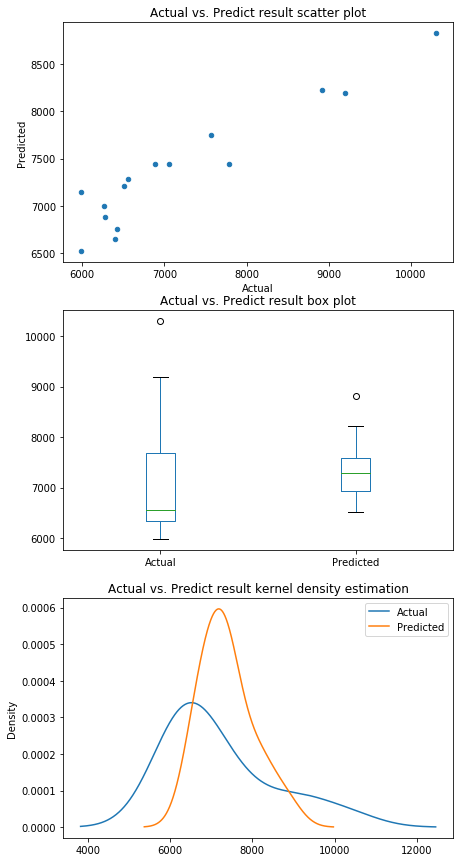

In [67]:
visualize_graph(df_pred_ANN_r)

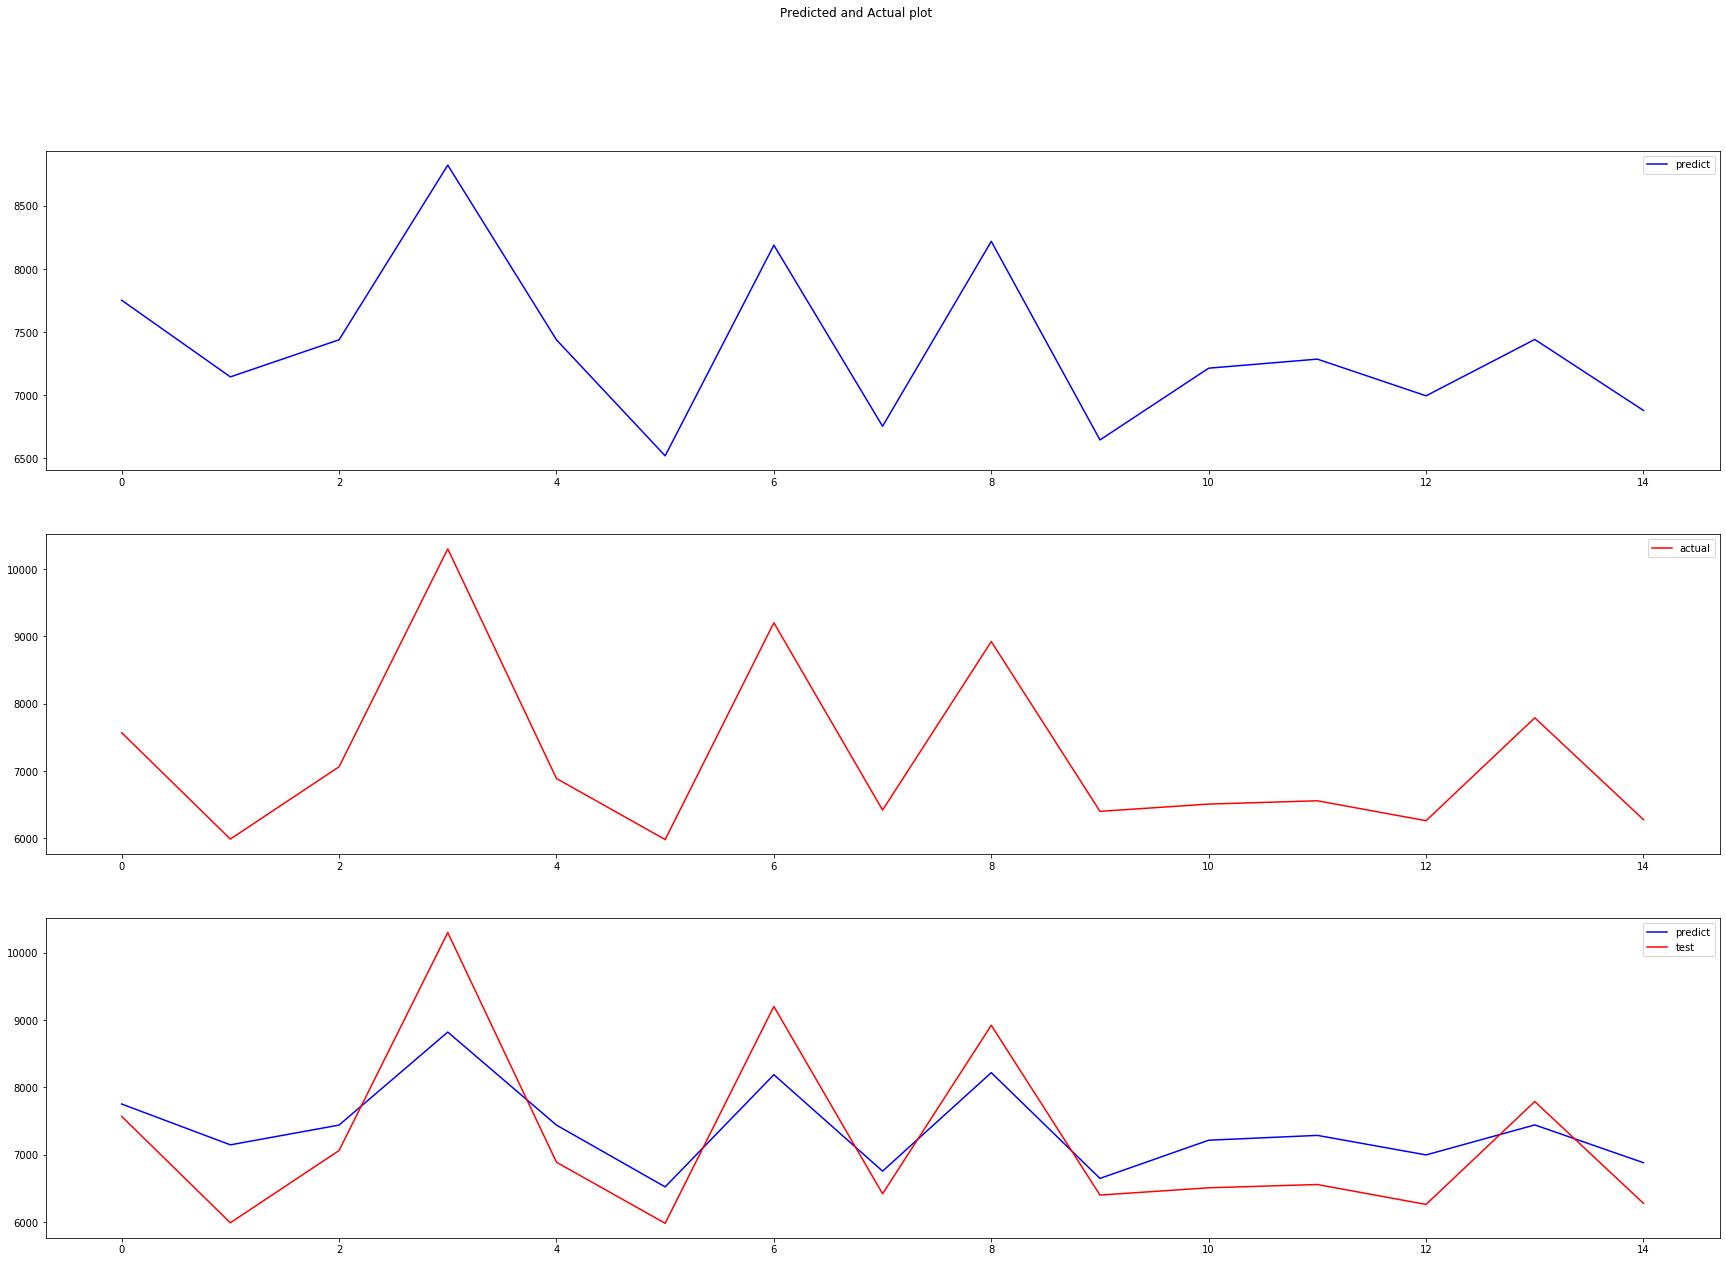

In [68]:
visualization(df_pred_ANN_r.Actual, df_pred_ANN_r.Predicted)